In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
CMAP = 'Reds'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('data/cervical_cancer_data.csv')

In [ ]:
data.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
data.replace('?',np.nan, inplace = True)

In [ ]:
targets = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
data_y = data[targets]
data_x = data.iloc[:,:-4]

# FEATURE STATISTICS

In [ ]:
data_x.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_y.describe()

,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000
mean,0.040793,0.086247,0.051282,0.064103
std,0.197925,0.280892,0.220701,0.245078
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


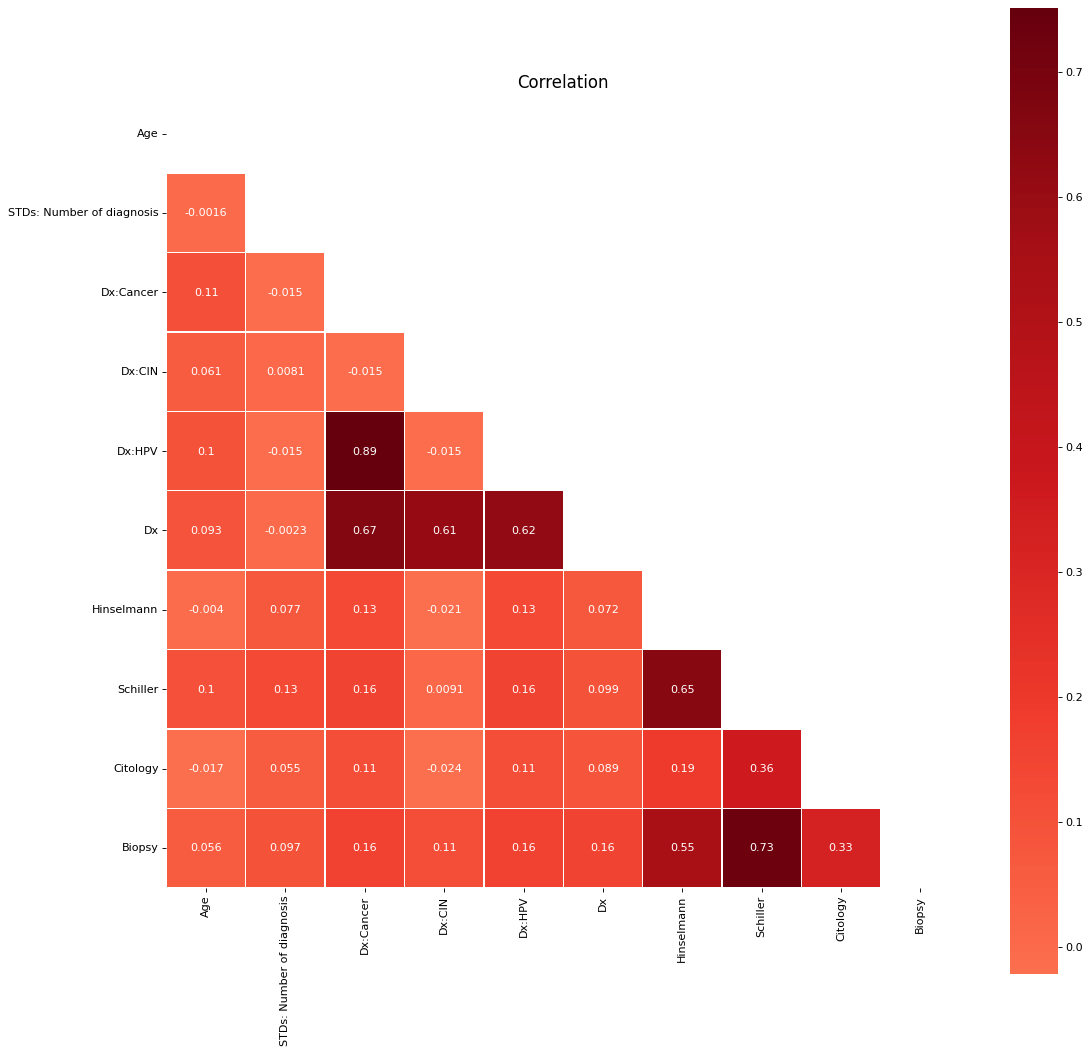

In [ ]:
plt.figure(figsize=(16,16),dpi=80)
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap = CMAP, robust=True, center=0, square=True, linewidths=.3, annot=True)
plt.title('Correlation', fontsize=15)
plt.show()

# CLASS DISTRIBUTIONS

There are only 6 patients that had a positive test result for all 4 diagnostic test out of 858 patients

In [ ]:
class_dist = pd.DataFrame(columns = ['Test','cancer','healthy'])
class_dist['Test'] = data_y.columns.to_list()
class_dist['cancer'] = [np.count_nonzero(data_y[col]) for col in data_y.columns]
class_dist['healthy'] = data.shape[0] - class_dist['cancer'] 

class_dist = pd.melt(class_dist, id_vars = ['Test'], var_name = 'Diagnosis', value_name = 'Count')

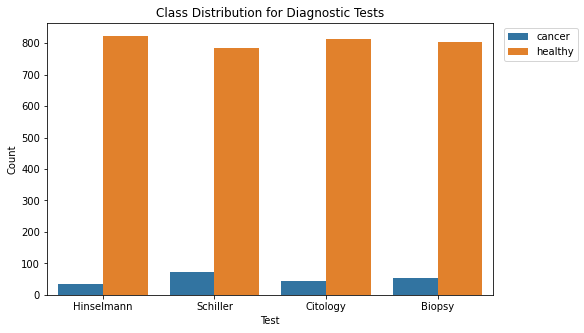

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.barplot(x = 'Test', y = 'Count', hue = 'Diagnosis', data = class_dist)
plt.legend(bbox_to_anchor=(1.2, 1), loc = 1)
plt.title('Class Distribution for Diagnostic Tests')
# plt.savefig('figures/class-distribution-all-tests.png', bbox_inches = 'tight')
plt.show()

# MISSING VALUE ANALYSIS

There are huge number of missing values in STD: Time since first and last diagnosis so it makes sense to drop these features. Moreover, there is a clear pattern where there is no information about contraceptives, IUD and any type of STDs. This is probably because the patients were not comfortable disclosing this information. Further analysis is done in later sections to determine which imputation technique will work the best.

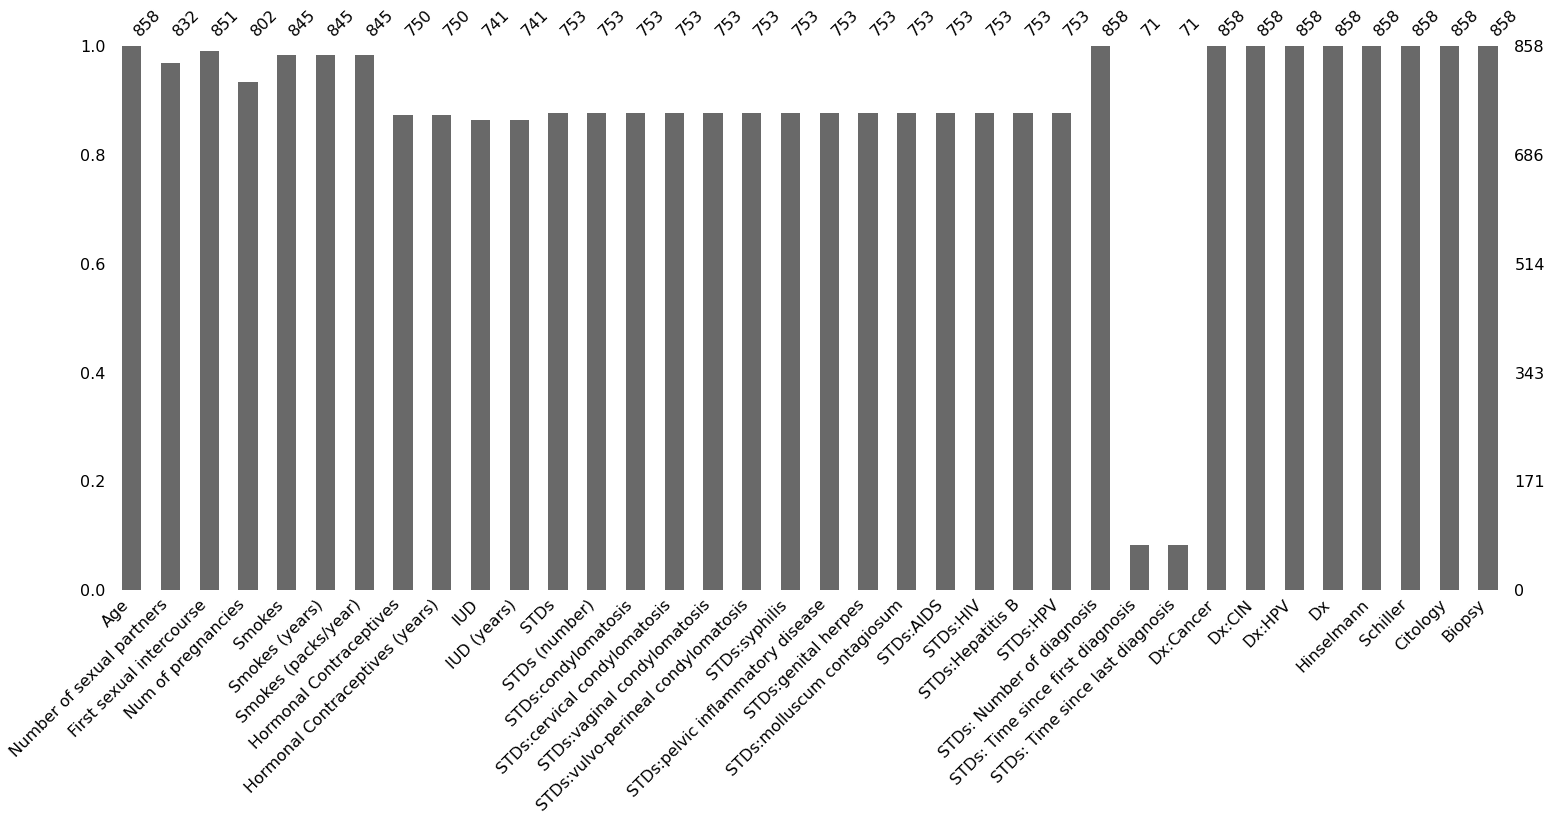

In [ ]:
msno.bar(data)
plt.show()

In [ ]:
missing_df = (100*data.isnull().sum()/858).to_frame()
missing_df.columns = ['percentage missing']
missing_df.sort_values(by = 'percentage missing')

,percentage missing
Age,0.000000
Schiller,0.000000
Hinselmann,0.000000
Dx,0.000000
Dx:HPV,0.000000
Dx:CIN,0.000000
Dx:Cancer,0.000000
STDs: Number of diagnosis,0.000000
Citology,0.000000
Biopsy,0.000000


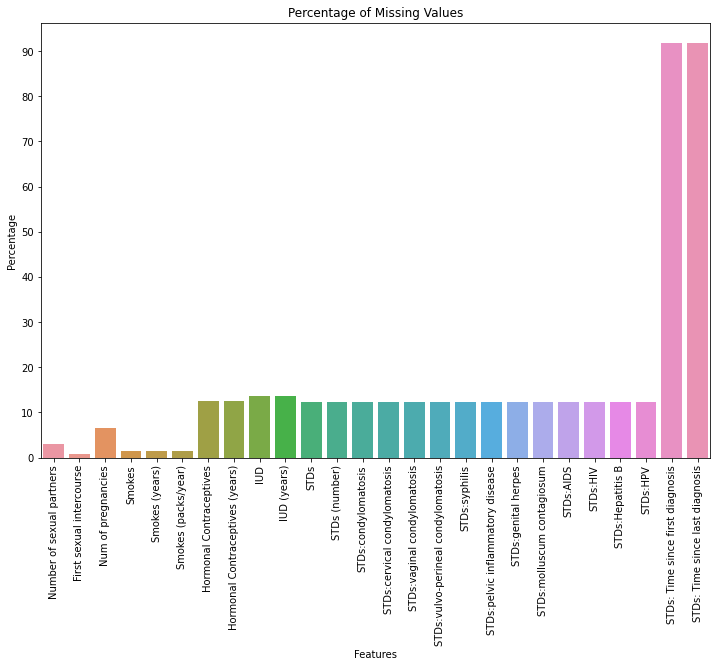

In [ ]:
missing_col_names = []
missing_col_percentages = []
i = 0
for index, row in missing_df.iterrows():
    percentage = row['percentage missing']
    if percentage != 0:
        missing_col_names.append(missing_df.index.values[i])
        missing_col_percentages.append(percentage)
    i+=1

plt.figure(figsize = (12,8))
axes = sns.barplot(x = missing_col_names, y = missing_col_percentages)
axes.tick_params(axis = 'x', rotation=90)
plt.yticks(np.arange(0, 100, 10))
axes.set_xlabel('Features')
axes.set_ylabel('Percentage')
axes.set_title('Percentage of Missing Values')
plt.show()

Dropping STDs: Time since first diagnosis and STDs: Time since last diagnosis as they do not give much information because of missing data

In [ ]:
# Dropping 2 columns
data.drop(columns = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], inplace = True)

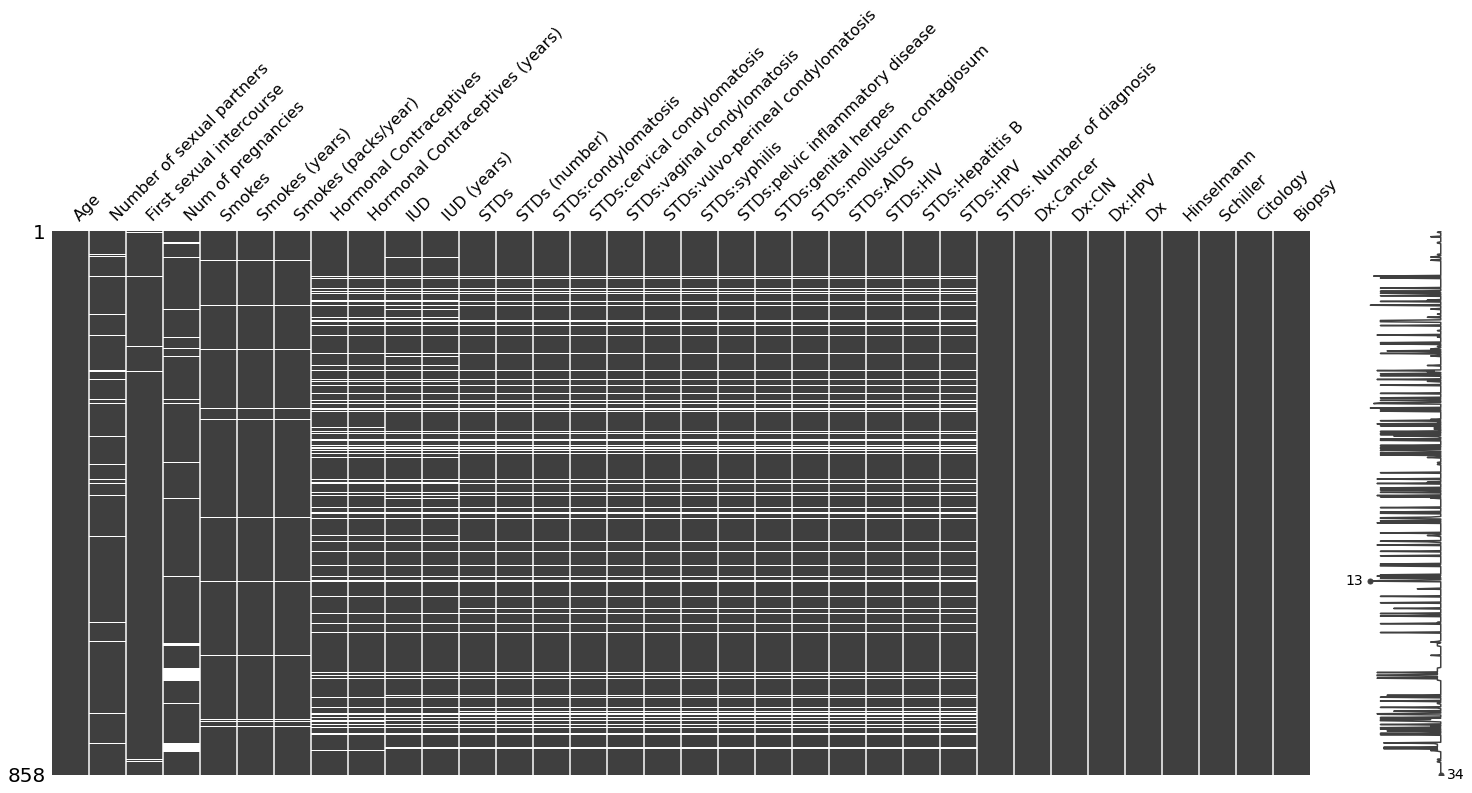

In [ ]:
# Displaying matrix plot for the missing values
msno.matrix(data)
plt.show()

# FEATURE ANALYSIS

In [ ]:
# For the remaining 34 columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = data.select_dtypes(include=numerics)
numerical_columns = list(newdf.columns)

non_numeric = []
for c in list(data.columns):
    if c not in numerical_columns:
        non_numeric.append(c)

print('Numerical features = \n{}'.format(numerical_columns))
print('\nCategorical features = \n{}'.format(non_numeric))

Numerical features = 
['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

Categorical features = 
['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV']


## Numerical and Categorical Features

### Converting appropriate categories to numerical

Above we can see that a few of the supposedly non-numerical categories are actually numerical; they just have been put in the dataset as strings. These categories are Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes (years) etc. We converted these to numeric values.

In [ ]:
data['Number of sexual partners'] = pd.to_numeric(data['Number of sexual partners'], errors='coerce')
data['First sexual intercourse'] = pd.to_numeric(data['First sexual intercourse'], errors='coerce')
data['Num of pregnancies'] = pd.to_numeric(data['Num of pregnancies'], errors='coerce')
data['Smokes (years)'] = pd.to_numeric(data['Smokes (years)'], errors='coerce')
data['Smokes (packs/year)'] = pd.to_numeric(data['Smokes (packs/year)'], errors='coerce')
data['Hormonal Contraceptives (years)'] = pd.to_numeric(data['Hormonal Contraceptives (years)'], errors='coerce')
data['IUD (years)'] = pd.to_numeric(data['IUD (years)'], errors='coerce')
data['STDs (number)'] = pd.to_numeric(data['STDs (number)'], errors='coerce')

In [ ]:
# 10 columns
numerical_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)', 'STDs: Number of diagnosis']

In [ ]:
# 20 columns
categorical_cols = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']

In [ ]:
# 4 target variables
targets = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

### Missing values for numerical features


In [ ]:
num_missing = pd.Series(data[numerical_cols].isnull().sum())
percentage_missing = pd.Series(100*data[numerical_cols].isnull().sum()/858) 
frame = {'number missing': num_missing, 'percentage missing': percentage_missing} 
res = pd.DataFrame(frame)   
res.sort_values(by = 'number missing')

,number missing,percentage missing
Age,0,0.000000
STDs: Number of diagnosis,0,0.000000
First sexual intercourse,7,0.815851
Smokes (years),13,1.515152
Smokes (packs/year),13,1.515152
Number of sexual partners,26,3.030303
Num of pregnancies,56,6.526807
STDs (number),105,12.237762
Hormonal Contraceptives (years),108,12.587413
IUD (years),117,13.636364


As we can see from the table, columns 'Age' and 'STDs: Number of diagnosis' don't have missing value.

## Correlations

Understanding the correlation between the variables

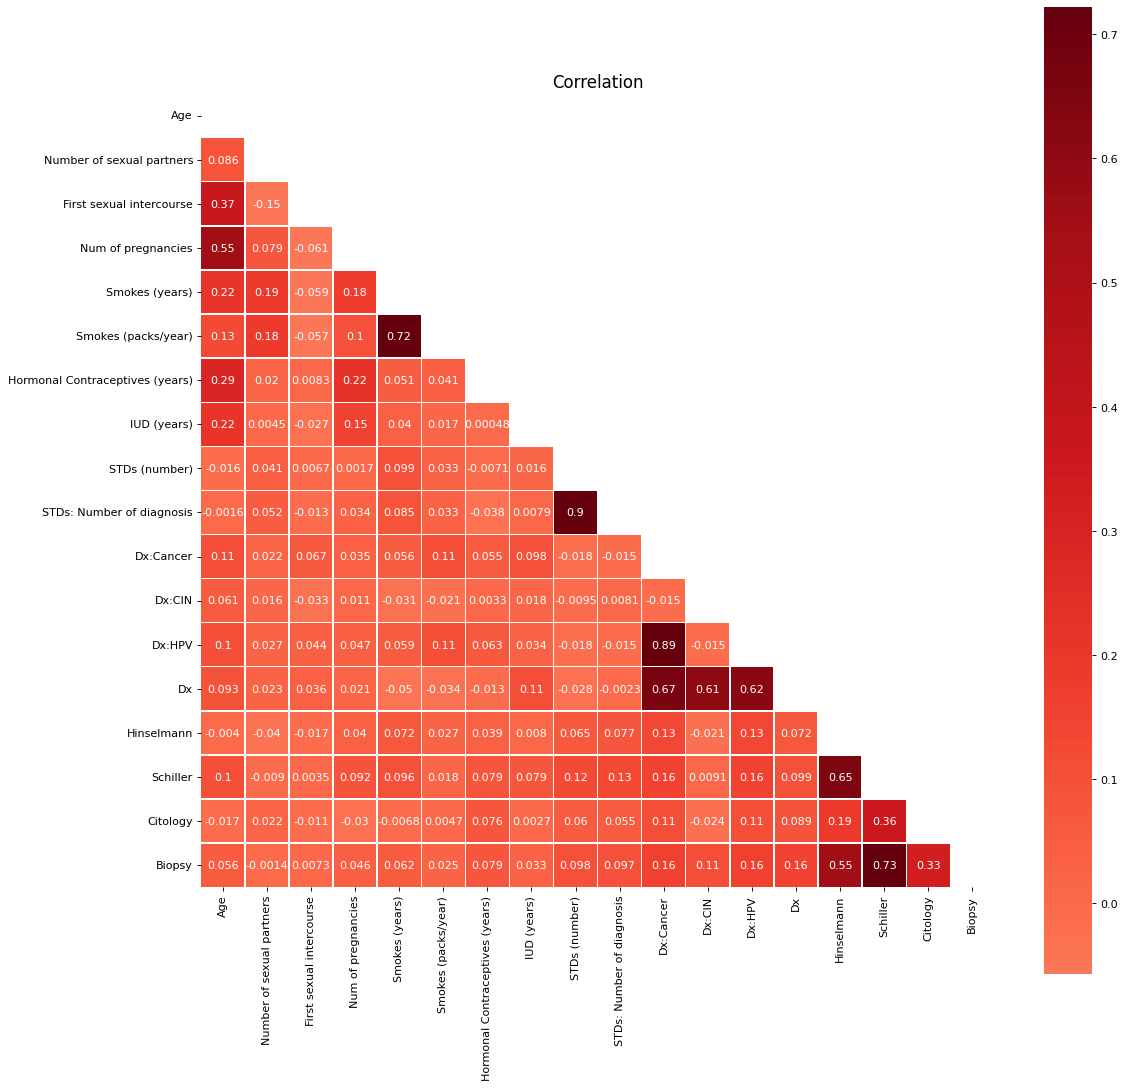

In [ ]:
plt.figure(figsize=(16,16),dpi=80)
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap = CMAP, robust=True, center=0, square=True, linewidths=.3, annot=True)
plt.title('Correlation', fontsize=15)
plt.show()

As apparent in the correlation table, Dx and Dx:Cancer are highly correlated with Dx:HPV and Dx:CIN (correlation > 0.6). Hence, we will drop Dx and Dx:Cancer.

Similarly, Smokes (years) and Smokes (packs/year) are also highly correlated as well as STDs: Number of diagnosis and STDs (number). Hence, we selected to drop STDs (number) and Smokes (packs/year). 

In [ ]:
data.drop(columns = ['Dx', 'Dx:Cancer'], inplace = True)
data.drop(columns = ['STDs (number)'], inplace = True)
data.drop(columns = ['Smokes (packs/year)'], inplace = True)

In [ ]:
numerical_cols.remove('STDs (number)')
numerical_cols.remove('Smokes (packs/year)')
numerical_cols

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes (years)',
 'Hormonal Contraceptives (years)',
 'IUD (years)',
 'STDs: Number of diagnosis']

In [ ]:
categorical_cols.remove('Dx:Cancer')
categorical_cols.remove('Dx')
categorical_cols

['Smokes',
 'Hormonal Contraceptives',
 'IUD',
 'STDs',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'Dx:CIN',
 'Dx:HPV']

## Analyzing relationships for Imputation

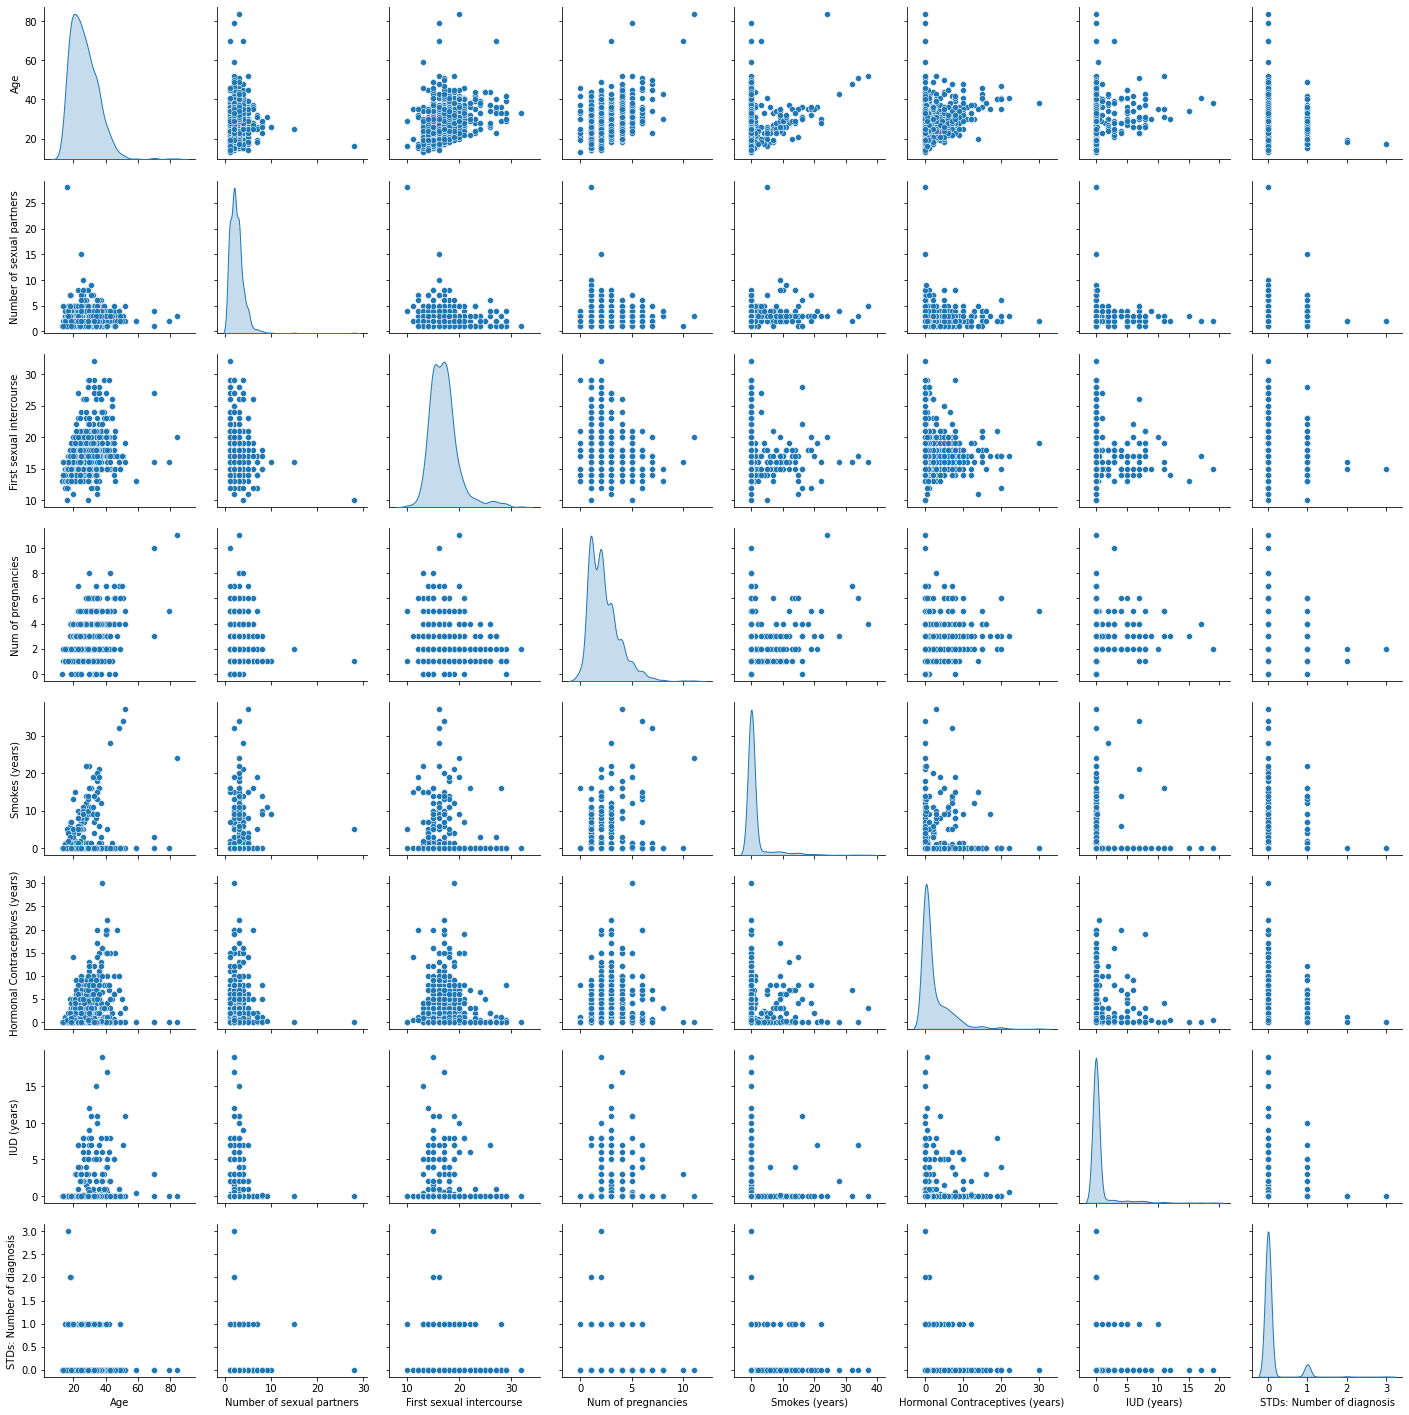

In [ ]:
sns.pairplot(data[numerical_cols], diag_kind = 'kde')
plt.show()

In [ ]:
std_df = data[['Age','Number of sexual partners']+[x for x in data.columns if 'STDs:' in x]]
std_df = std_df.sort_values(by = 'Number of sexual partners')

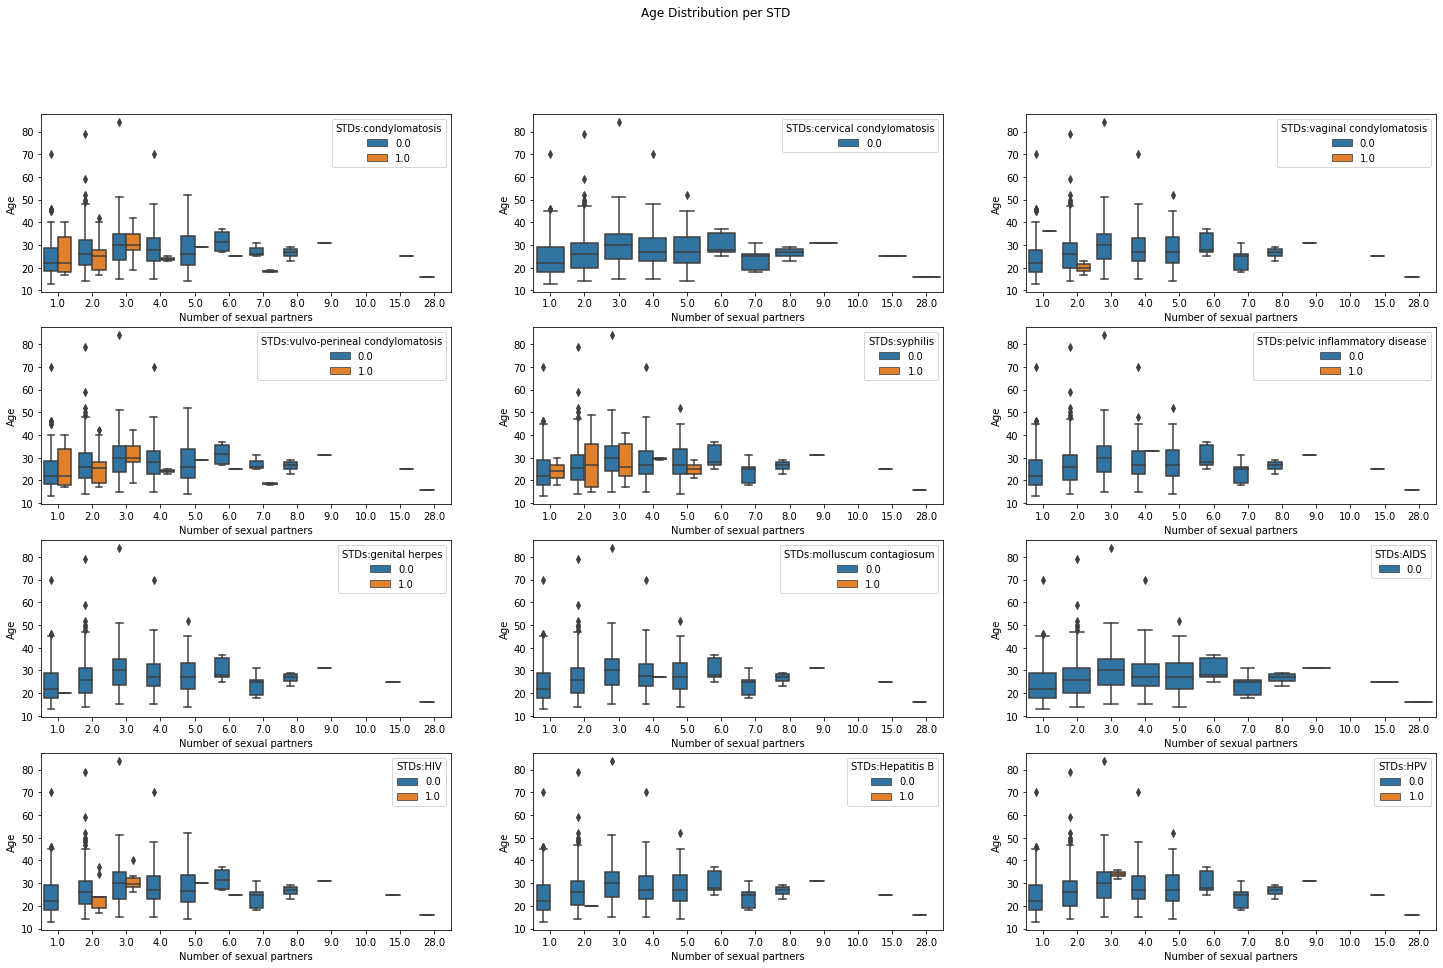

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(25, 15), sharey=False)
fig.suptitle('Age Distribution per STD')

for i in range(3):
    sns.boxplot(ax = axes[0][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+2], \
            data = std_df)

for i in range(3):
    sns.boxplot(ax = axes[1][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+5], \
            data = std_df)
    
for i in range(3):
    sns.boxplot(ax = axes[2][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+8], \
            data = std_df)
    
for i in range(3):
    sns.boxplot(ax = axes[3][i],y = 'Age', x = 'Number of sexual partners', hue = std_df.iloc[:,i+11], \
            data = std_df)

plt.savefig('Age-distribution-per-STD.png', bbox_inches = 'tight')
plt.show()

### Imputation for missing numerical values

For all 8 numerical features, we can divide them into two classes: sex-related and non sex-related. For non sex-related features, we can simply impute missing values with the mean of the column.

'STDs: Number of diagnosis' doesn't have any missing value, so no need to impute.

In [ ]:
nonsexual_num_cols = ['Age', \
            'Smokes (years)', \
            'Hormonal Contraceptives (years)',\
            'IUD (years)']
nonsexual_num_data = data[nonsexual_num_cols]

In [ ]:
# To round the mean value till a certain decimal place
digits_num = {'First sexual intercourse': 0, \
              'Smokes (years)': 9, \
             'Number of sexual partners': 0,\
             'Num of pregnancies': 0,
             'Hormonal Contraceptives (years)': 9,\
             'IUD (years)': 2}

In [ ]:
for column in list(nonsexual_num_data.columns[nonsexual_num_data.isnull().sum() > 0]):
    mean_val = nonsexual_num_data[column].mean()
    
    if digits_num[column] == 0:
        mean_val = int(mean_val)
    else:
        mean_val = round(mean_val, digits_num[column])

    data[column].fillna(mean_val, inplace=True)

if not list(nonsexual_num_data.columns[nonsexual_num_data.isnull().sum() > 0]):
    print("Already imported missing values for non sex-related numerical features")

For sex-related features, basically they are related to age so we impute missing values according to that person's age. In specific, 
1.Number of sexual partners can be positively related to age. 
2.The first sexual intercourse number can be negatively related to age, since with time people have started becoming sexually active much earlier.

In [ ]:
sexual_num_cols = ['Number of sexual partners',\
          'First sexual intercourse', \
          'Num of pregnancies']
sexual_num_data = data[sexual_num_cols]

In [ ]:
age_min, age_max = min(data['Age']), max(data['Age'])

for column in list(sexual_num_data.columns[sexual_num_data.isnull().sum() > 0]):
    col_min, col_max = min(data[column]), max(data[column])

    for i in range(858):
        if np.isnan(data[column][i]):
            age = data['Age'][i]
            data[column][i] = int((age-age_min)/(age_max-age_min)*(col_max-col_min) + col_min)

if not list(sexual_num_data.columns[sexual_num_data.isnull().sum() > 0]):
    print("Already imported missing values for sex-related numerical features")

In [ ]:
# all missing numerical values are imputed

num_missing = pd.Series(data[numerical_cols].isnull().sum())
percentage_missing = pd.Series(100*data[numerical_cols].isnull().sum()/858) 
frame = {'number missing': num_missing, 'percentage missing': percentage_missing} 
res = pd.DataFrame(frame)   
res.sort_values(by = 'number missing')

,number missing,percentage missing
Age,0,0.0
Number of sexual partners,0,0.0
First sexual intercourse,0,0.0
Num of pregnancies,0,0.0
Smokes (years),0,0.0
Hormonal Contraceptives (years),0,0.0
IUD (years),0,0.0
STDs: Number of diagnosis,0,0.0


### Imputation for missing categorical values

###Numerical Features Visualisations

#### IUD (years) and Cervical Cancer

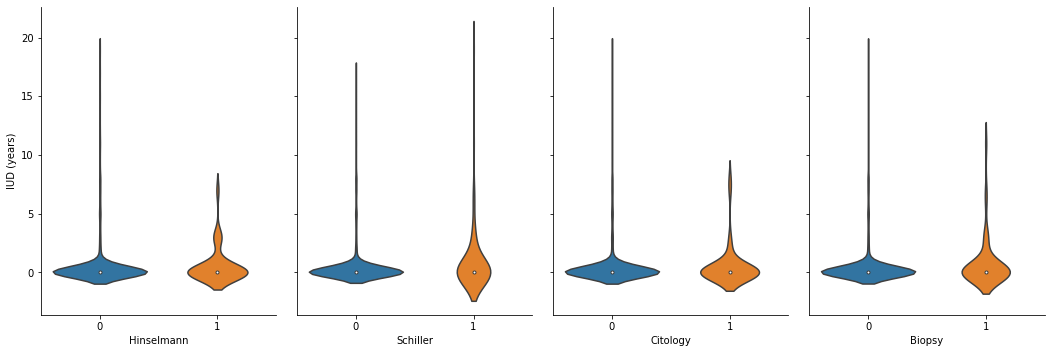

In [ ]:
sns.PairGrid(data,
             y_vars=['IUD (years)'],
             x_vars= targets,
             aspect=.75,
             size=5).map(sns.violinplot);

#### Number of sexual partner, Age and Cervical Cancer

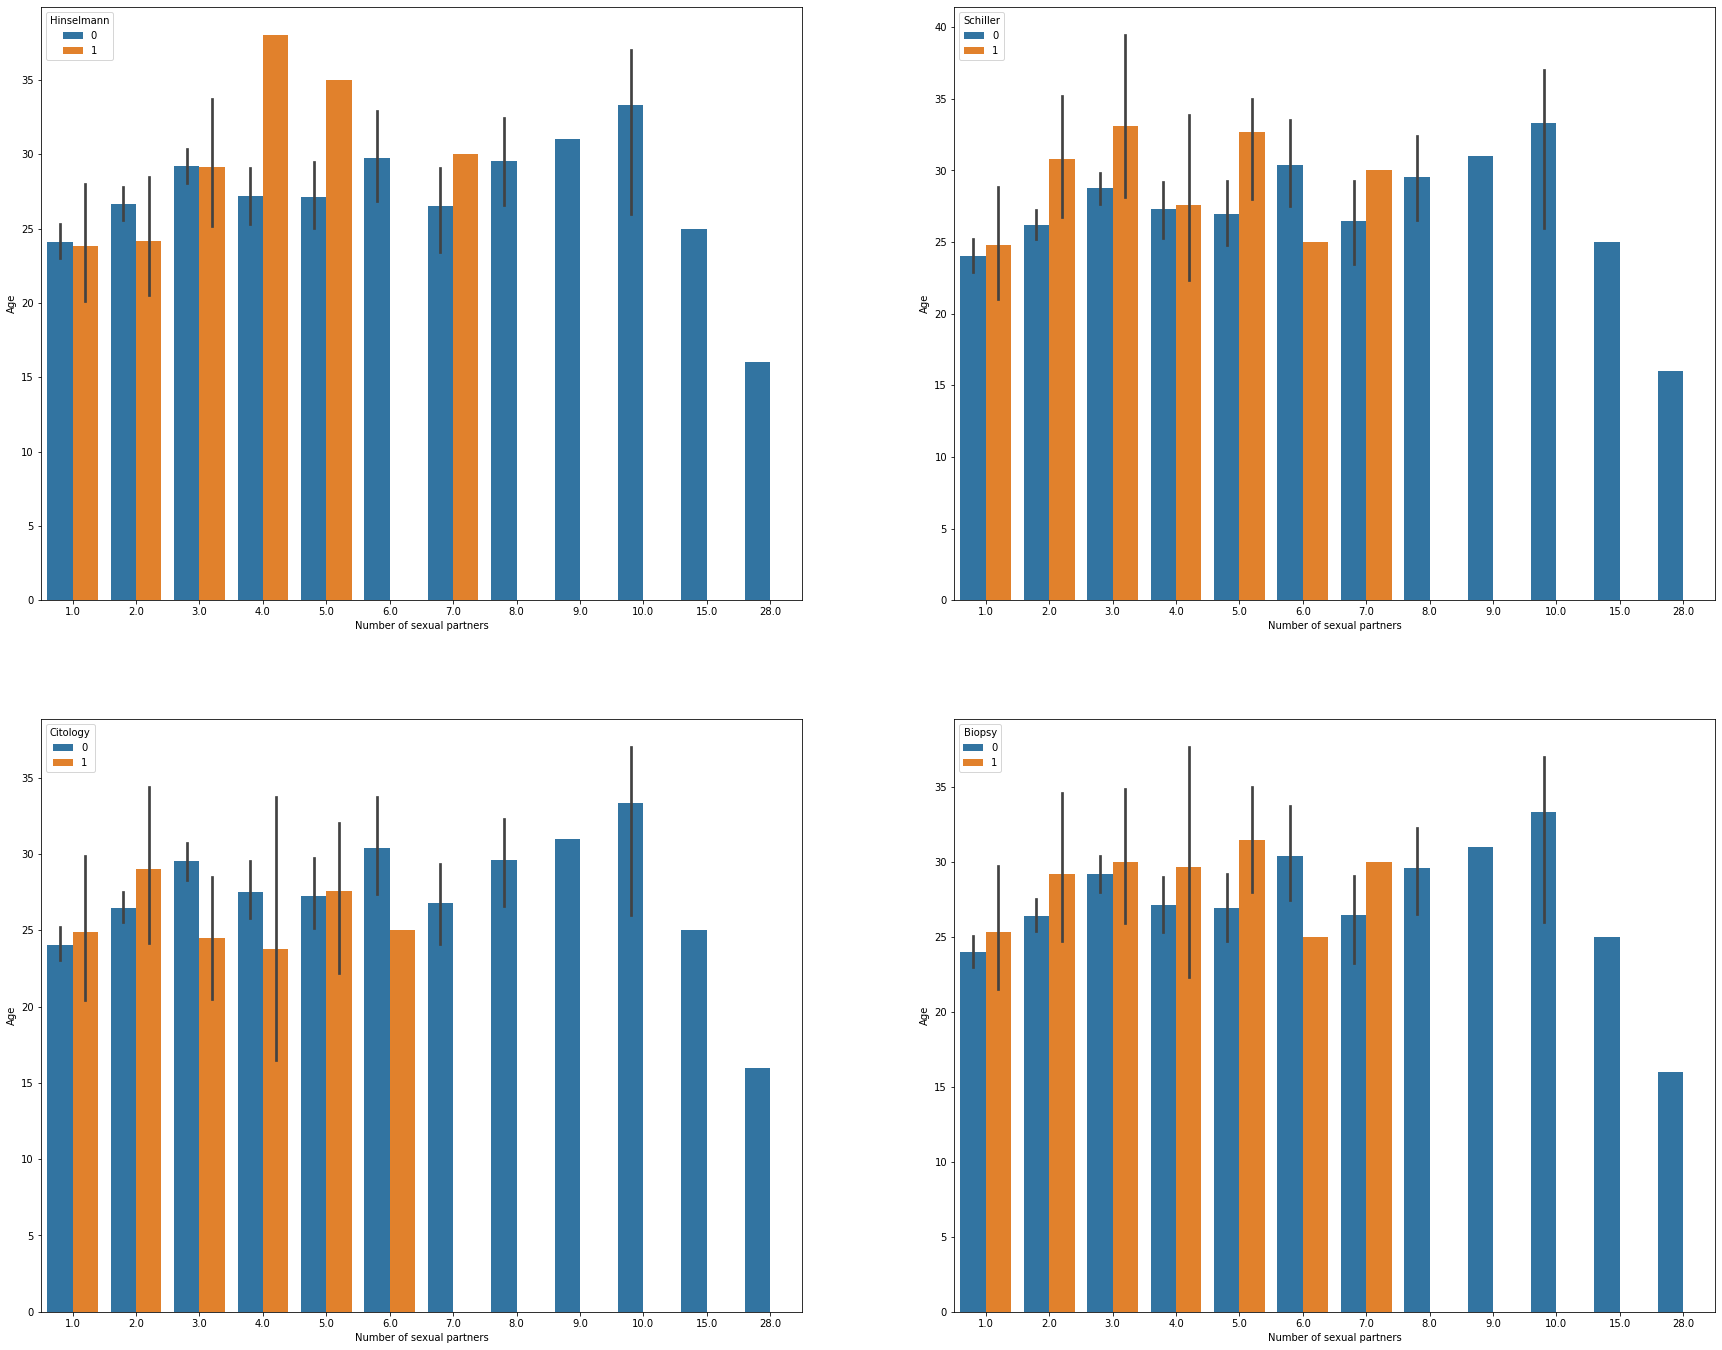

In [ ]:
plt.figure(figsize=(30, 24))

for i, target in enumerate(targets):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Number of sexual partners', y='Age', hue=target, data=data)

The above visualization shows that there is no direct relationship between number of sexual partners and cancer incidence as the distribution of patients with and without cancer remains almost the same for every diagnostic test. It is intriguing that with the increase in number of sexual partners we saw absolutely no patients with cancer. Intuitively, one would think that higher number of sexual partners would mean a higher risk of contracting an STD which in-turn could lead to a higher risk of cervical cancer.

#### Age and Cervical Cancer

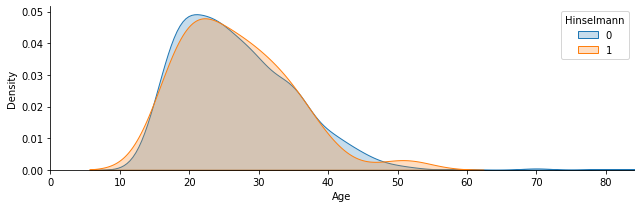

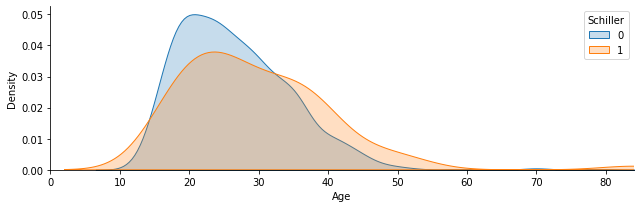

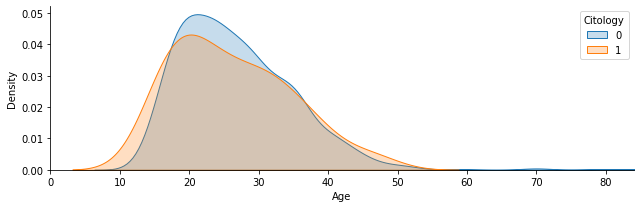

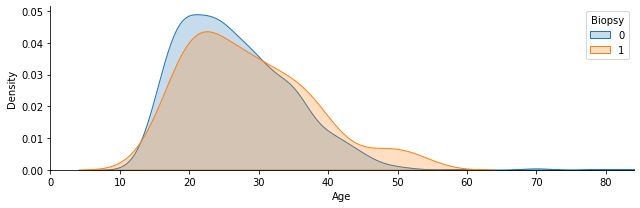

In [ ]:
for target in targets:
  fig = sns.FacetGrid(data,hue=target,aspect=3,legend_out=False)
  fig.map(sns.kdeplot,'Age',shade=True)
  fig.set(xlim=(0,data['Age'].max()))
  fig.add_legend()

#### First sexual encounter and Cancer

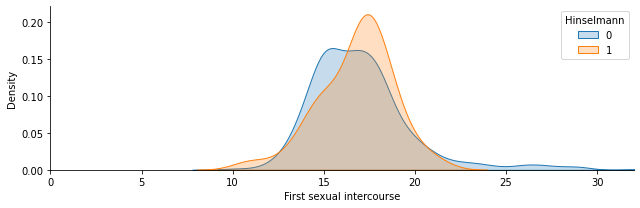

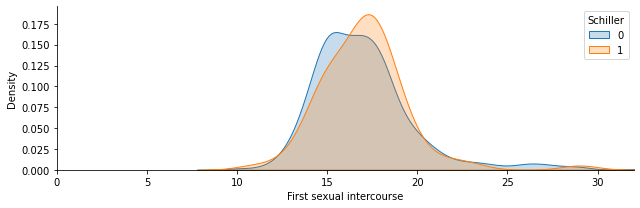

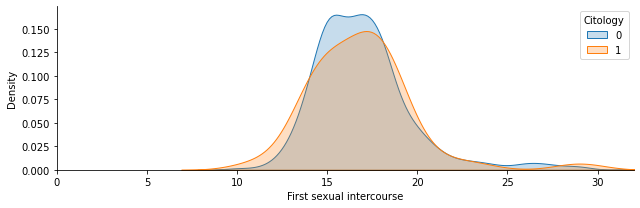

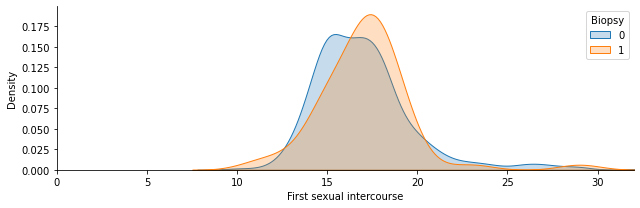

In [ ]:
for target in targets:
  fig = sns.FacetGrid(data,hue=target,aspect=3,legend_out=False)
  fig.map(sns.kdeplot,'First sexual intercourse',shade=True)
  fig.set(xlim=(0,data['First sexual intercourse'].max()))
  fig.add_legend()

#### Number of Pregnancies, Number of STDs and Cervical Cancer

From the below dot plot it is evident that the number of diagnosed STDs is not related to the number of pregnancies

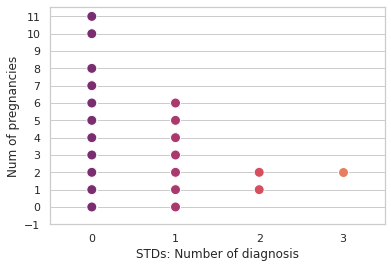

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.stripplot(y = 'Num of pregnancies', x = 'STDs: Number of diagnosis', data = data, size=10, orient="v", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")
plt.yticks(np.arange(-1,12,1))
plt.show()

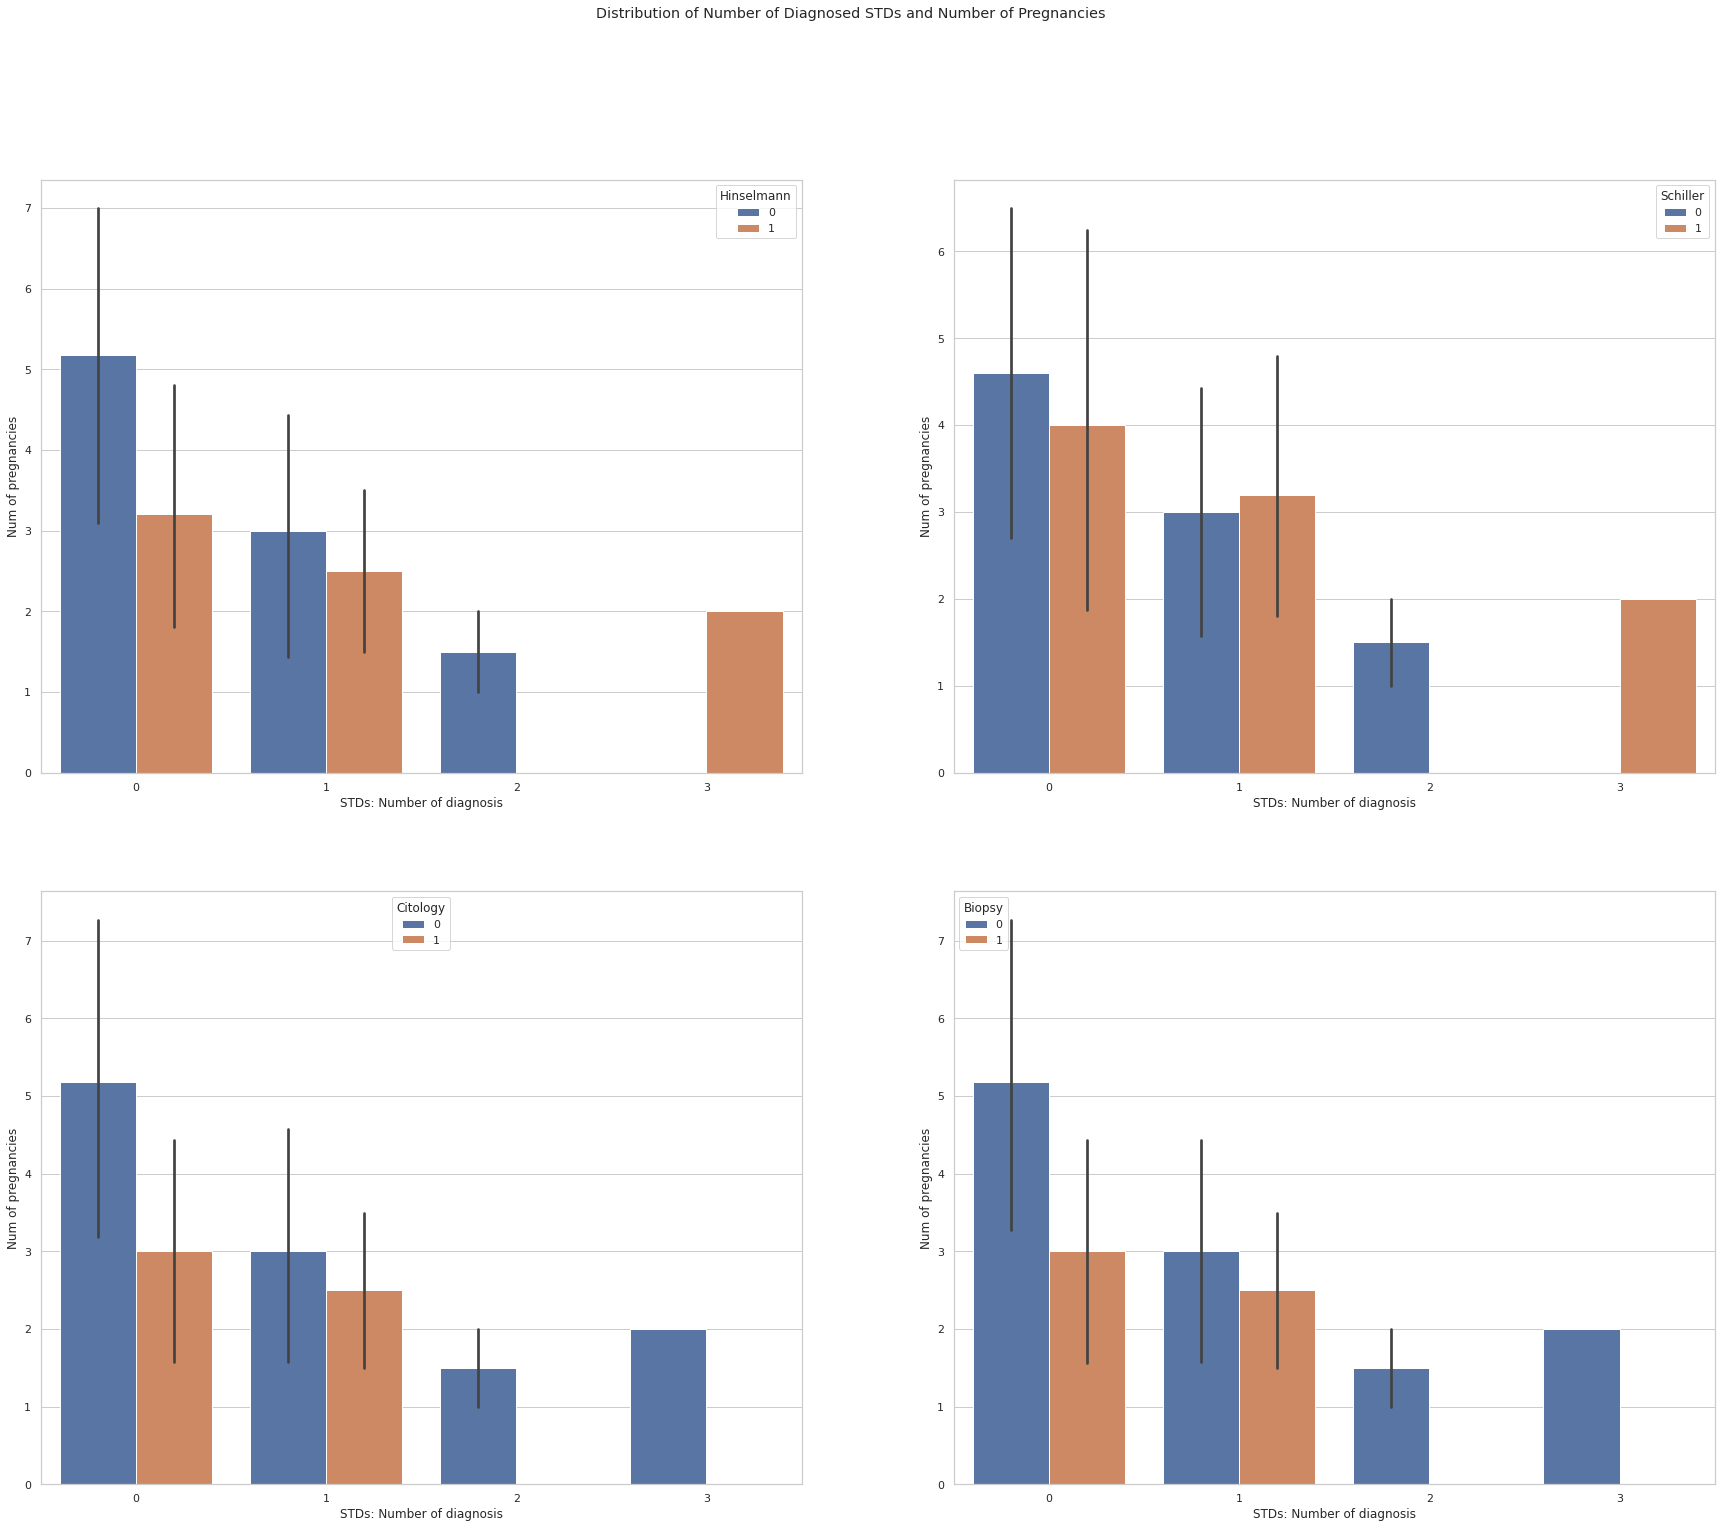

In [ ]:
plt.figure(figsize=(30, 24))

for i, target in enumerate(targets):
    plt.subplot(2, 2, i+1)
    temp_df = data.groupby(['STDs: Number of diagnosis', 'Num of pregnancies', target]).size().reset_index(name = 'Count')
    sns.barplot(x='STDs: Number of diagnosis', y = 'Num of pregnancies', hue=target, data=temp_df)

plt.suptitle('Distribution of Number of Diagnosed STDs and Number of Pregnancies')
plt.show()

#### Hormonal Contraceptives, Dx:CIN and Cervical Cancer

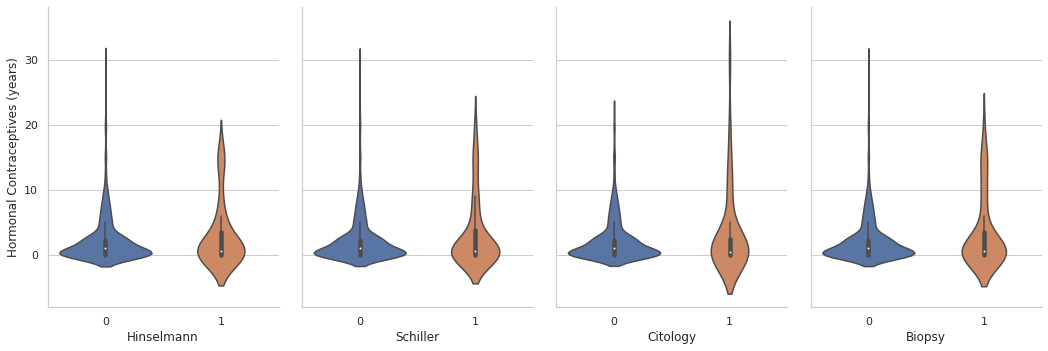

In [ ]:
sns.PairGrid(data,
             y_vars=['Hormonal Contraceptives (years)'],
             x_vars= targets,
             aspect=.75,
             size=5).map(sns.violinplot)
plt.show()

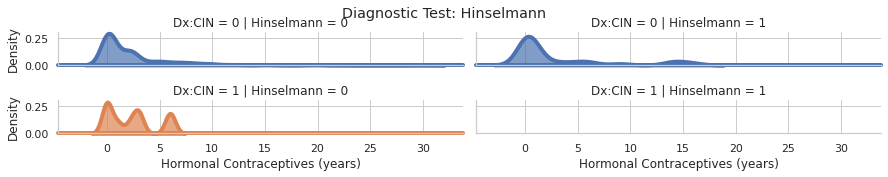

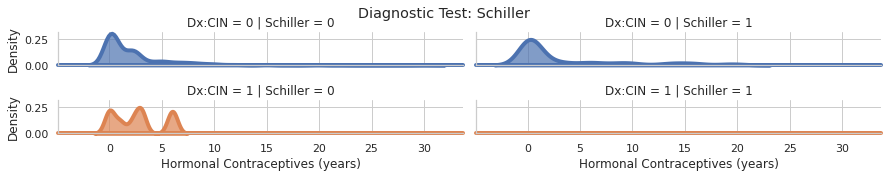

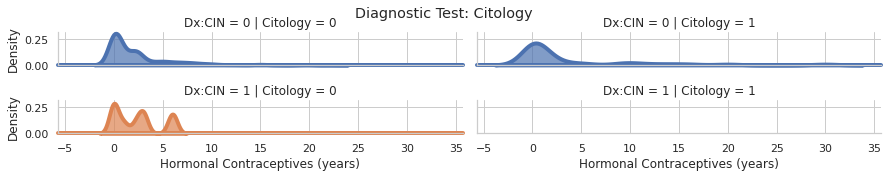

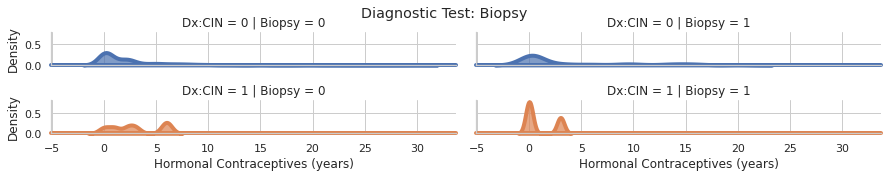

In [ ]:
for t in targets:
  rp = sns.FacetGrid(data, col = t, row = 'Dx:CIN', hue="Dx:CIN", aspect=5, height = 1.25)
  
  rp.map(sns.kdeplot, 'Hormonal Contraceptives (years)', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
  rp.map(plt.axhline, y=0, lw=4, clip_on=False)
  rp.fig.suptitle('Diagnostic Test: {}'.format(t))
  plt.show()

### Looking at the relationship between Smokes, Smokes (years) (and similar categories) for Imputation

In [ ]:
assert data.loc[(data["Smokes (years)"] != 0.0) & (data["Smokes"] == "0.0")].empty
assert data.loc[(data["Hormonal Contraceptives (years)"] != 0.0) & (data["Hormonal Contraceptives"] == "0.0")].empty
assert data.loc[(data["IUD (years)"] != 0.0) & (data["IUD"] == "0.0")].empty
assert data.loc[(data["STDs: Number of diagnosis"] != 0.0) & (data["STDs"] == "0.0")].empty

As you can see, there are no instances in which Smokes is false but Smokes (years) is a number other than 0. Hence, we can remove Smokes, Hormonal Contraceptives, IUD, and STDs.

In [ ]:
drop_colms = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs']

data.drop(columns = drop_colms, inplace = True)

for col in drop_colms:
  categorical_cols.remove(col)

### Getting updated set of categorical values

In [ ]:
categorical_cols

['STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'Dx:CIN',
 'Dx:HPV']

In [ ]:
# categorical_cols = ['STDs:condylomatosis','STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis',
#                     'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
#                     'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'Dx:CIN', 'Dx:HPV']

#14

In [ ]:
numerical_cols

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes (years)',
 'Hormonal Contraceptives (years)',
 'IUD (years)',
 'STDs: Number of diagnosis']

In [ ]:
# numerical_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
#                 'Hormonal Contraceptives (years)','IUD (years)', 'STDs: Number of diagnosis']

# 8

### Imputing missing categorical values

In [ ]:
cat_maj = []
impute_by_0 = []
for c in categorical_cols:
  perc = data[c].value_counts(normalize=True)[0] * 100
  cat_maj.append((c, perc))
  if perc > 98:
    impute_by_0.append(c)
cat_maj.sort(key=lambda x: x[1], reverse=True)
cat_maj

[('STDs:cervical condylomatosis', 100.0),
 ('STDs:AIDS', 100.0),
 ('STDs:pelvic inflammatory disease', 99.867197875166),
 ('STDs:genital herpes', 99.867197875166),
 ('STDs:molluscum contagiosum', 99.867197875166),
 ('STDs:Hepatitis B', 99.867197875166),
 ('STDs:HPV', 99.734395750332),
 ('STDs:vaginal condylomatosis', 99.46879150066401),
 ('Dx:CIN', 98.95104895104895),
 ('Dx:HPV', 97.9020979020979),
 ('STDs:syphilis', 97.60956175298804),
 ('STDs:HIV', 97.60956175298804),
 ('STDs:vulvo-perineal condylomatosis', 94.28950863213812),
 ('STDs:condylomatosis', 94.15670650730412)]

As it's evident, all of the categories have a clear majority. The majority value is 0. For cervical condylomatosis, vaginal condylomatosis, pelvic inflammatory disease, genital herpes, molluscum contagiosum, AIDS, Hepatitis B, HPV, more than 98% of the values are 0. Hence, imputing missing values with 0 for these categories is suitable.

In [ ]:
data.update(data[impute_by_0].fillna(0))

In [ ]:
## Missing values

num_missing = pd.Series(data[categorical_cols].isnull().sum())
percentage_missing = pd.Series(100*data[categorical_cols].isnull().sum()/858) 
frame = {'number missing': num_missing, 'percentage missing': percentage_missing} 
res = pd.DataFrame(frame)   
res.sort_values(by = 'number missing')

,number missing,percentage missing
STDs:cervical condylomatosis,0,0.000000
STDs:vaginal condylomatosis,0,0.000000
STDs:pelvic inflammatory disease,0,0.000000
STDs:genital herpes,0,0.000000
STDs:molluscum contagiosum,0,0.000000
STDs:AIDS,0,0.000000
STDs:Hepatitis B,0,0.000000
STDs:HPV,0,0.000000
Dx:CIN,0,0.000000
Dx:HPV,0,0.000000


For other categorical variables, we elected to do knn imputation with k = 30.

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=30)
data = pd.DataFrame(np.round(imputer.fit_transform(data)),columns = data.columns)

The visualizations above depict that women between age 20 to 35 are facing the highest risk of developing cervical cancer. There is a slight peak at the age of 50 as well.

From the above visualizations it is pretty evident that women who became sexually active between the ages of 15 and 20 have the highest risk of developing cervical cancer.

In [ ]:
## All values imputed

num_missing = pd.Series(data[categorical_cols].isnull().sum())
percentage_missing = pd.Series(100*data[categorical_cols].isnull().sum()/858) 
frame = {'number missing': num_missing, 'percentage missing': percentage_missing} 
res = pd.DataFrame(frame)   
res.sort_values(by = 'number missing')

,number missing,percentage missing
STDs:condylomatosis,0,0.0
STDs:cervical condylomatosis,0,0.0
STDs:vaginal condylomatosis,0,0.0
STDs:vulvo-perineal condylomatosis,0,0.0
STDs:syphilis,0,0.0
STDs:pelvic inflammatory disease,0,0.0
STDs:genital herpes,0,0.0
STDs:molluscum contagiosum,0,0.0
STDs:AIDS,0,0.0
STDs:HIV,0,0.0


### Categorical Features Visualization

#### Focus on HPV infection and cancer incidence

In [ ]:
std_hpv = data[['STDs:HPV']+data_y.columns.to_list()].copy()
std_hpv.dropna(inplace = True)
std_hpv['STDs:HPV'] = pd.to_numeric(std_hpv['STDs:HPV'], errors='coerce')

std_hpv_biopsy = std_hpv[['STDs:HPV','Biopsy']].groupby(['STDs:HPV','Biopsy']).size().reset_index(name = 'Count')
std_hpv_hinselmann = std_hpv[['STDs:HPV','Hinselmann']].groupby(['STDs:HPV','Hinselmann']).size().reset_index(\
                                                                                        name = 'Count')
std_hpv_schiller = std_hpv[['STDs:HPV','Schiller']].groupby(['STDs:HPV','Schiller']).size().reset_index(\
                                                                                            name = 'Count')
std_hpv_citology = std_hpv[['STDs:HPV','Citology']].groupby(['STDs:HPV','Citology']).size().reset_index(\
                                                                                                name = 'Count')

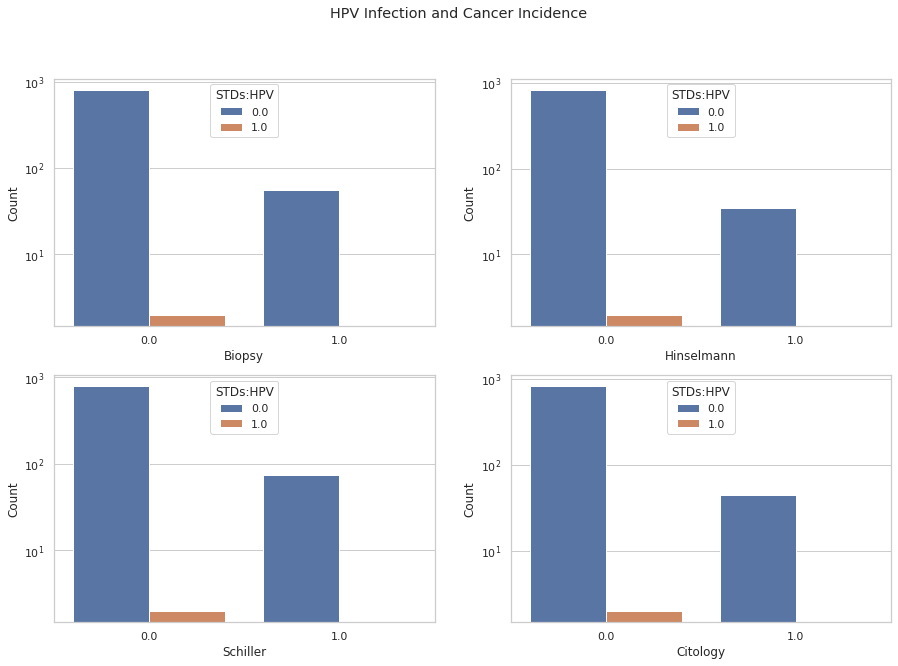

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)
fig.suptitle('HPV Infection and Cancer Incidence')

for i in range(2):
  for j in range(2):
    axes[i][j].set_yscale('log')
sns.barplot(ax = axes[0][0], x = 'Biopsy', y = 'Count', hue = 'STDs:HPV', data = std_hpv_biopsy)
sns.barplot(ax = axes[0][1], x = 'Hinselmann', y = 'Count', hue = 'STDs:HPV', data = std_hpv_hinselmann)
sns.barplot(ax = axes[1][0], x = 'Schiller', y = 'Count', hue = 'STDs:HPV', data = std_hpv_schiller)
sns.barplot(ax = axes[1][1], x = 'Citology', y = 'Count', hue = 'STDs:HPV', data = std_hpv_citology)

plt.savefig('HPV-infection-cancer-incidence.png', bbox_inches = 'tight')
plt.show()

#### Other STDs and Cervical Cancer

In [ ]:
target_cols = ['STDs:condylomatosis',\
 'STDs:cervical condylomatosis',\
 'STDs:vaginal condylomatosis',\
 'STDs:vulvo-perineal condylomatosis',\
 'STDs:syphilis',\
 'STDs:pelvic inflammatory disease',\
 'STDs:genital herpes',\
 'STDs:molluscum contagiosum',\
 'STDs:AIDS',\
 'STDs:HIV',\
 'STDs:Hepatitis B',\
 'Dx:CIN',\
 'Hinselmann',\
 'Biopsy',\
 'Citology',\
 'Schiller']
target_data = data[target_cols]
# target_data.head()

In [ ]:
df = target_data[['STDs:HIV','Biopsy']]
df = df.groupby(['STDs:HIV','Biopsy']).size().reset_index(name = 'Count')
df = df[['Count','STDs:HIV','Biopsy']]

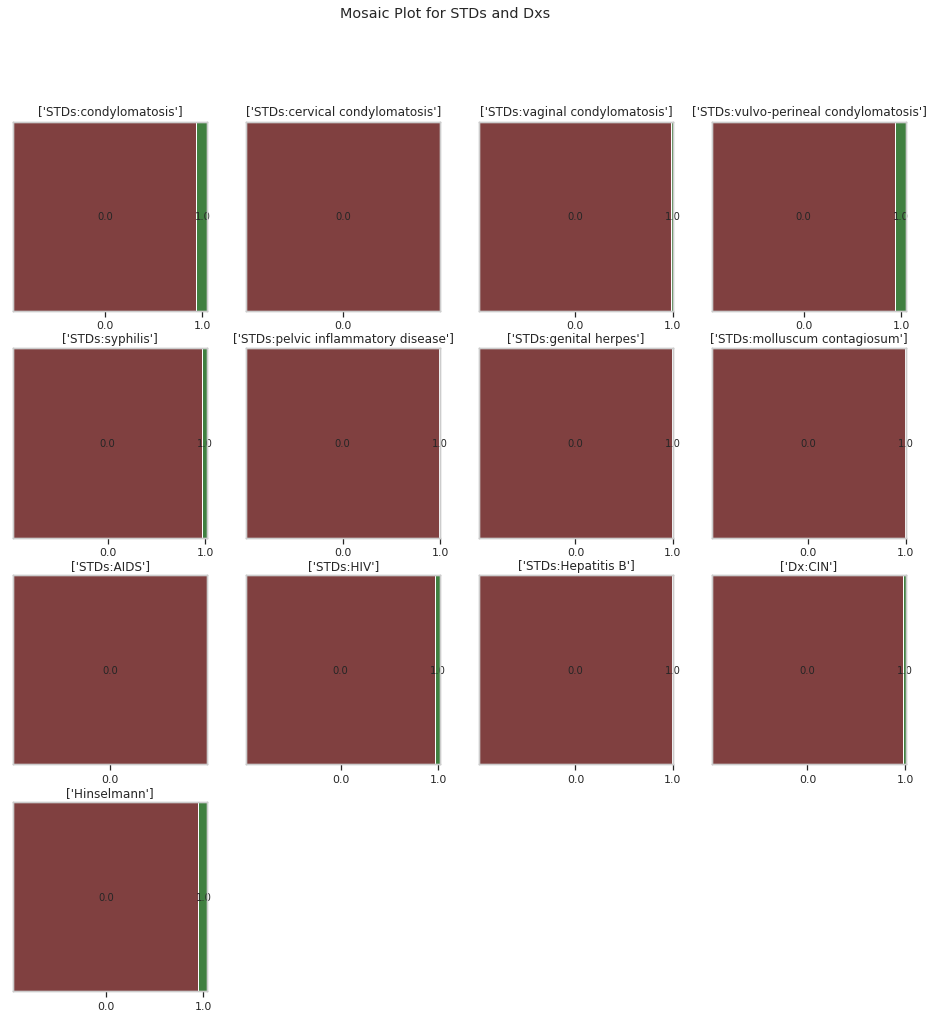

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
fig.suptitle('Mosaic Plot for STDs and Dxs')
for i in range(13):
  tmp_col = [target_cols[i], ]
  tmp_data = data[tmp_col]
  mosaic(data=tmp_data, index=tmp_col, ax=axes[i//4][i%4])
  axes[i//4][i%4].set_title(tmp_col)
for i in range(13, 16):
  fig.delaxes(axes[i//4][i%4])

As you can tell from the mosaic plots above, these categories all 
have a clear majority. The majority value is 0.

In [ ]:
# for target in targets:
#   fig = sns.FacetGrid(data,hue=target,aspect=3,legend_out=False)
#   fig.map(sns.kdeplot,'Num of pregnancies',shade=True)
#   fig.set(xlim=(0,data['Num of pregnancies'].max()))
#   fig.add_legend()

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
# for i in range(2):
#     for j in range(2):
#         sns.scatterplot(x='First sexual intercourse',hue=targets[i+j],y='Num of pregnancies',data=data, ax=axes[i][j])

# DATA SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
# The target variables
targets

['Hinselmann', 'Schiller', 'Citology', 'Biopsy']

Class split for target variables:

In [ ]:
for target in targets:
  print(data[target].value_counts())

0.0    823
1.0     35
Name: Hinselmann, dtype: int64
0.0    784
1.0     74
Name: Schiller, dtype: int64
0.0    814
1.0     44
Name: Citology, dtype: int64
0.0    803
1.0     55
Name: Biopsy, dtype: int64


We have 4 different target variables, so creating 4 different data splits for training

In [ ]:
X = data
y = data[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]

X = X.drop(columns=['Hinselmann', 'Schiller', 'Citology', 'Biopsy'])

y_hi = y['Hinselmann']
y_sc = y['Schiller']
y_ci = y['Citology']
y_bi = y['Biopsy']

In [ ]:
# Splitting into 80% development, 20% test

X_dev_hi, X_test_hi, y_dev_hi, y_test_hi = train_test_split(X, y_hi, stratify=y_hi, test_size=0.20, random_state=42)

X_dev_sc, X_test_sc, y_dev_sc, y_test_sc = train_test_split(X, y_sc, stratify=y_sc, test_size=0.20, random_state=42)

X_dev_ci, X_test_ci, y_dev_ci, y_test_ci = train_test_split(X, y_ci, stratify=y_ci, test_size=0.20, random_state=42)

X_dev_bi, X_test_bi, y_dev_bi, y_test_bi = train_test_split(X, y_bi, stratify=y_bi, test_size=0.20, random_state=42)

# DATA SAMPLING, SCALING AND ENCODING

As you can see, the data is highly imbalanced for all 4 of our targets. So, we will use SMOTE to balance the data, as part of imb_make_pipeline before fitting the respective models.

In [ ]:
# Using SMOTE to balance the data
smote = SMOTE(random_state=42)

In [ ]:
!pip install category_encoders

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder

     |████████████████████████████████| 86 kB 4.2 MB/s 


Taking the numerical and categorical variables and performing scaling and encoding.

In [ ]:
numerical_cols

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes (years)',
 'Hormonal Contraceptives (years)',
 'IUD (years)',
 'STDs: Number of diagnosis']

In [ ]:
categorical_cols

['STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'Dx:CIN',
 'Dx:HPV']

In [ ]:
# numerical_cols = ['Age', \
#           'STDs: Number of diagnosis',\
#           'Number of sexual partners', \
#           'First sexual intercourse', \
#           'Num of pregnancies',\
#           'Smokes (years)',\
#           'Hormonal Contraceptives (years)',\
#           'IUD (years)']

# categorical_cols = ['STDs:condylomatosis',\
#           'STDs:cervical condylomatosis',\
#           'STDs:vaginal condylomatosis',\
#           'STDs:vulvo-perineal condylomatosis',\
#           'STDs:syphilis',\
#           'STDs:pelvic inflammatory disease',\
#           'STDs:genital herpes',\
#           'STDs:molluscum contagiosum',\
#           'STDs:AIDS',\
#           'STDs:HIV',\
#           'STDs:Hepatitis B',\
#           'STDs:HPV',\
#           'Dx:CIN',\
#           'Dx:HPV']

In [ ]:
preprocess = make_column_transformer(
    (TargetEncoder(handle_unknown="ignore"), categorical_cols),
    (MinMaxScaler(), numerical_cols))

# Model Training

In [ ]:
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, RocCurveDisplay, plot_roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Random Forest

In this section, we train an RandomForest model for each of the four target variables.

We use sklearn's RandomForestClassifier for the base model and we use sklearn.model_selection's GridSearchCV to determine the best parameters for our model. 

In our GridSearchCV, we try the following values for the following variables:

n_estimators: [75, 100, 150, 200] \
max_depth': [10, 12, 15, 17]

We have used a 5-fold cross validation for our models in grid search.
Also, we would like to reduce the number of false negatives in our model because missing a cancerous cell can be dangerous. Here, cost of both false positives and false negatives can have different consequences though. Hence, when searching for the best parameters for our model, we rank those models by their AUC scores.

We test our models by using the test set for that target variable. We look at the accuracy, recall, precision, and F1-score of the model. We also plot the confusion matrix to visualize how our model is predicting the test data. Finally, we make graphs on the feature importances of features to see whether our models make sense intuitively, and plot AUROC and PR curves to understand the performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

In [ ]:
rf_param_grid = {"n_estimators": [75, 100, 150, 200], "max_depth": [10, 12, 15, 17]}
feat_imps_rf = defaultdict(float)

### Hinselmann

In [ ]:
# Model Selection
pipe_rf = imb_make_pipeline(smote,
              preprocess,
              GridSearchCV(RandomForestClassifier(random_state=42),
                            param_grid=rf_param_grid,
                            cv=5, scoring="roc_auc")
                            )

pipe_rf.fit(X_dev_hi, y_dev_hi)

grid_search_result_rf = pipe_rf.named_steps['gridsearchcv']
best_params_rf = grid_search_result_rf.best_params_

print(f"Best parameters: {best_params_rf}")
print(f"Best dev set score: {grid_search_result_rf.best_score_}")

Best parameters: {'max_depth': 15, 'n_estimators': 75}
Best dev set score: 0.9960394191743948


In [ ]:
# Performance of the test dataset from the optimal models
y_pred_rf = pipe_rf.predict(X_test_hi)
print(f"Random forest test set score: {pipe_rf.score(X_test_hi, y_test_hi)}")

print(f"recall on test set: {recall_score(y_test_hi, y_pred_rf, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_hi, y_pred_rf, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_hi, y_pred_rf, pos_label=1):0.4f}.")

Random forest test set score: 0.9809523809523809
recall on test set: 0.7143.
precision on test set: 1.0000.
F1-score on test set: 0.8333.


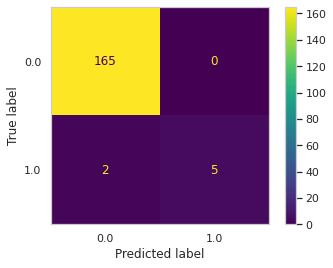

In [ ]:
plot_confusion_matrix(pipe_rf, X_test_hi, y_test_hi)

plt.grid(False)

In [ ]:
y_pred_prob = pipe_rf.predict_proba(X_test_hi)[:, 1]
fpr, tpr, _ = roc_curve(y_test_hi, y_pred_prob, pos_label=1)
roc_auc_hi = auc(fpr, tpr)

print("AUC score: ", roc_auc_hi)

AUC score:  0.9809523809523809


In [ ]:
hi_roc = []
hi_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_hi, y_pred_prob)
hi_pr = []
hi_pr.append((rc,pr))

defaultdict(<class 'float'>, {'Age': 0.11937333603211109, 'Number of sexual partners': 0.0, 'First sexual intercourse': 0.002432734199824997, 'Num of pregnancies': 0.16469127995864125, 'Smokes (years)': 0.02262453548021379, 'Hormonal Contraceptives (years)': 0.0003036716114964221, 'IUD (years)': 0.0005480255758724673, 'STDs: Number of diagnosis': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.2068652408086487, 'STDs:vaginal condylomatosis': 0.0008938199008266358, 'STDs:vulvo-perineal condylomatosis': 0.0010399109176836478, 'STDs:syphilis': 0.0037384556546739573, 'STDs:pelvic inflammatory disease': 0.30193709758546716, 'STDs:genital herpes': 0.2895759138323385, 'STDs:molluscum contagiosum': 0.29282999018337447, 'STDs:AIDS': 0.3107111863817553, 'STDs:HIV': 0.4721113131904046, 'STDs:Hepatitis B': 0.15349511232356428, 'STDs:HPV': 0.33138570840110115, 'Dx:CIN': 0.12767133774522282, 'Dx:HPV': 0.19777133021677915})
['Age', 'Number of sexual partners', 'First sexual interco

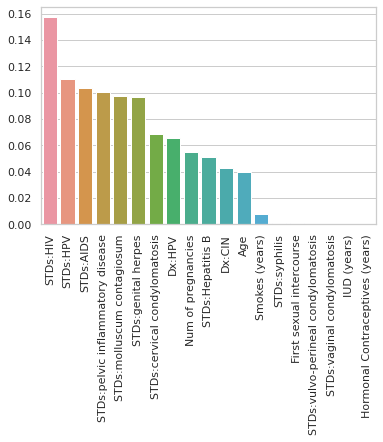

In [ ]:
best_est_rf = grid_search_result_rf.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_est_rf.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_rf[feature_names[i]] += best_est_rf.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print('Top 3 most important features for this trained tree:', feats[:3])

In [ ]:
# Shape of development and test features
print("Shape of test features: ", X_test_hi.shape)

# Number of positive and negative labels in undersampled development set
print("Positive labels (class 1) count: ", y_test_hi.value_counts()[1])
print("Negative labels (class 0) count: ", y_test_hi.value_counts()[0])

Shape of test features:  (172, 22)
Positive labels (class 1) count:  7
Negative labels (class 0) count:  165


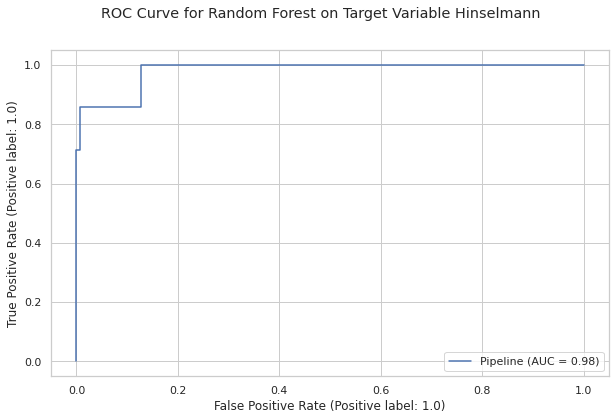

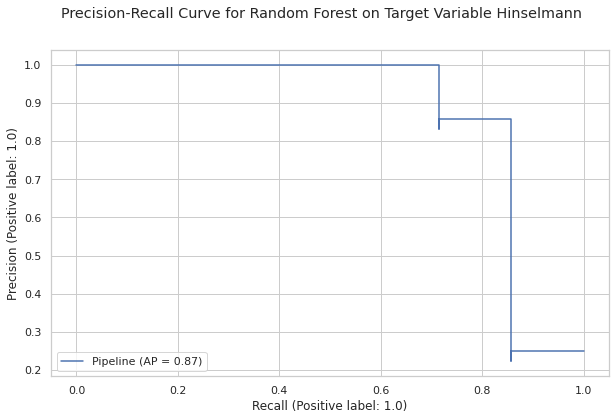

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for Random Forest on Target Variable Hinselmann')
plot_roc_curve(pipe_rf, X_test_hi, y_test_hi, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for Random Forest on Target Variable Hinselmann')
plot_precision_recall_curve(pipe_rf, X_test_hi, y_test_hi, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_hi, y_pred_rf).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_hi, y_pred_rf):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_hi, y_pred_rf, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_hi, y_pred_rf, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_hi, y_pred_rf, pos_label=1):0.4f}.")

accuracy on test set: 0.9884.
sensitivity on test set: 0.7143.
specificity on test set: 1.0000.
negative predictive accuracy(npa) on test set: 0.9880.
recall on test set: 0.7143.
precision on test set: 1.0000.
F1-score on test set: 0.8333.


### Schiller

In [ ]:
# Model Selection
pipe_rf = imb_make_pipeline(smote,
                            preprocess,
                            GridSearchCV(RandomForestClassifier(random_state=42),
                                         param_grid=rf_param_grid,
                                         cv=5, scoring="roc_auc")
                            )

pipe_rf.fit(X_dev_sc, y_dev_sc)

grid_search_result_rf = pipe_rf.named_steps['gridsearchcv']
best_params_rf = grid_search_result_rf.best_params_

print(f"Schiller RF Best parameters: {best_params_rf}")
print(f"Best dev set score: {grid_search_result_rf.best_score_}")

Schiller RF Best parameters: {'max_depth': 15, 'n_estimators': 75}
Best dev set score: 0.9856923936507936


In [ ]:
# Performance of the test dataset from the optimal models
y_pred_rf = pipe_rf.predict(X_test_sc)
print(f"Schiller Random forest test set score: {pipe_rf.score(X_test_sc, y_test_sc)}")

print(f"recall on test set: {recall_score(y_test_sc,y_pred_rf,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_sc,y_pred_rf,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_sc,y_pred_rf,pos_label=1):0.4f}.")

Schiller Random forest test set score: 0.8951167728237792
recall on test set: 0.6667.
precision on test set: 0.7143.
F1-score on test set: 0.6897.


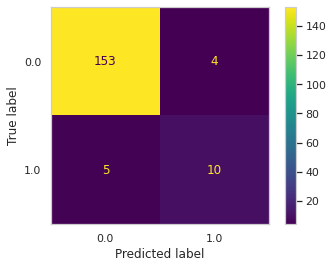

In [ ]:
plot_confusion_matrix(pipe_rf, X_test_sc, y_test_sc)

plt.grid(False)

In [ ]:
y_pred_prob = pipe_rf.predict_proba(X_test_sc)[:, 1]
fpr, tpr, _ = roc_curve(y_test_sc, y_pred_prob, pos_label=1)
roc_auc_sc = auc(fpr, tpr)

print("AUC score: ", roc_auc_sc)

AUC score:  0.8951167728237792


defaultdict(<class 'float'>, {'Age': 0.2166347450279511, 'Number of sexual partners': 0.0, 'First sexual intercourse': 0.005117966431435473, 'Num of pregnancies': 0.252119776089185, 'Smokes (years)': 0.037621584193592204, 'Hormonal Contraceptives (years)': 0.0006397014311049421, 'IUD (years)': 0.0006789303392925497, 'STDs: Number of diagnosis': 0.0004447224915960278, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.2653187379759131, 'STDs:vaginal condylomatosis': 0.0011472954795475959, 'STDs:vulvo-perineal condylomatosis': 0.0023076443308873997, 'STDs:syphilis': 0.009859159749016971, 'STDs:pelvic inflammatory disease': 0.43235283969888405, 'STDs:genital herpes': 0.5448176825185908, 'STDs:molluscum contagiosum': 0.5198378535980803, 'STDs:AIDS': 0.6068781134680812, 'STDs:HIV': 0.7695180160095129, 'STDs:Hepatitis B': 0.21995040910947877, 'STDs:HPV': 0.5939103563307604, 'Dx:CIN': 0.23066479655882371, 'Dx:HPV': 0.29017966916826593})
['Age', 'Number of sexual partners', 'First s

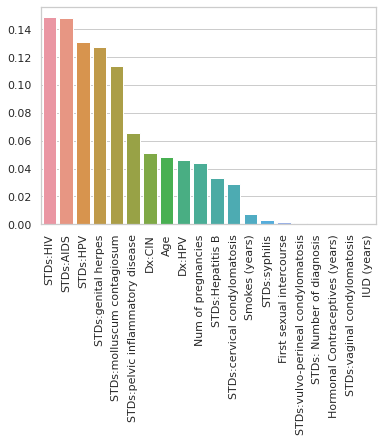

In [ ]:
best_est_rf = grid_search_result_rf.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_est_rf.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_rf[feature_names[i]] += best_est_rf.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print('Top 3 most important features for this trained tree:', feats[:3])

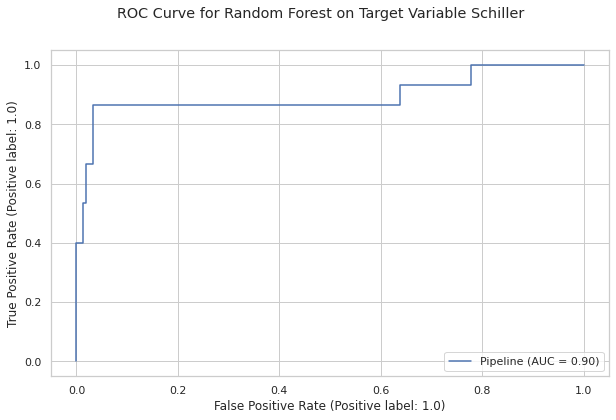

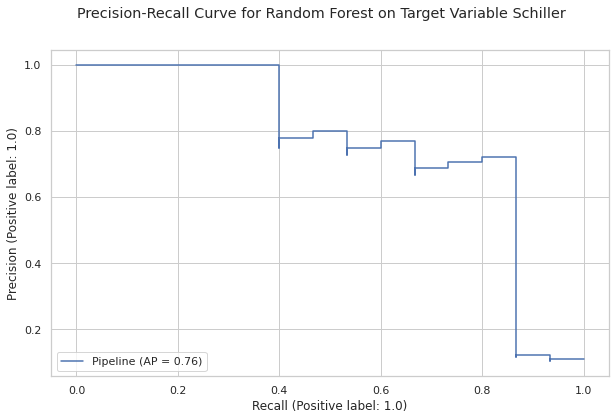

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for Random Forest on Target Variable Schiller')
plot_roc_curve(pipe_rf, X_test_sc, y_test_sc, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for Random Forest on Target Variable Schiller')
plot_precision_recall_curve(pipe_rf, X_test_sc, y_test_sc, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_sc, y_pred_rf).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_sc, y_pred_rf):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_sc, y_pred_rf, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_sc, y_pred_rf, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_sc, y_pred_rf, pos_label=1):0.4f}.")

accuracy on test set: 0.9477.
sensitivity on test set: 0.6667.
specificity on test set: 0.9745.
negative predictive accuracy(npa) on test set: 0.9684.
recall on test set: 0.6667.
precision on test set: 0.7143.
F1-score on test set: 0.6897.


In [ ]:
sc_roc = []
sc_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_sc, y_pred_prob)
sc_pr = []
sc_pr.append((rc,pr))

### Citology

In [ ]:
# Model Selection
pipe_rf = imb_make_pipeline(smote,
                            preprocess,
                            GridSearchCV(RandomForestClassifier(random_state=42),
                                         param_grid=rf_param_grid,
                                         cv=5, scoring="roc_auc")
                            )

pipe_rf.fit(X_dev_ci, y_dev_ci)

grid_search_result_rf = pipe_rf.named_steps['gridsearchcv']
best_params_rf = grid_search_result_rf.best_params_

print(f"Citology Random Forest Best parameters: {best_params_rf}")
print(f"Best dev set score: {grid_search_result_rf.best_score_}")

Citology Random Forest Best parameters: {'max_depth': 17, 'n_estimators': 200}
Best dev set score: 0.991488323772528


In [ ]:
# Performance of the test dataset from the optimal models
y_pred_rf = pipe_rf.predict(X_test_ci)
print(f"Random forest test set score: {pipe_rf.score(X_test_ci, y_test_ci)}")

print(f"recall on test set: {recall_score(y_test_ci, y_pred_rf,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_ci, y_pred_rf,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_ci, y_pred_rf,pos_label=1):0.4f}.")

Random forest test set score: 0.978186775732788
recall on test set: 0.7778.
precision on test set: 0.7000.
F1-score on test set: 0.7368.


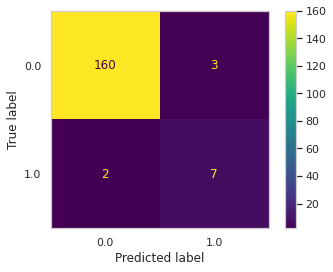

In [ ]:
plot_confusion_matrix(pipe_rf, X_test_ci, y_test_ci)

plt.grid(False)

In [ ]:
y_pred_prob = pipe_rf.predict_proba(X_test_ci)[:, 1]
fpr, tpr, _ = roc_curve(y_test_ci, y_pred_prob, pos_label=1)
roc_auc_ci = auc(fpr, tpr)

print("AUC score: ", roc_auc_ci)

AUC score:  0.978186775732788


defaultdict(<class 'float'>, {'Age': 0.25785568881156673, 'Number of sexual partners': 0.0, 'First sexual intercourse': 0.0057770065940129164, 'Num of pregnancies': 0.29776114211688587, 'Smokes (years)': 0.04061259325234325, 'Hormonal Contraceptives (years)': 0.0009330598844264683, 'IUD (years)': 0.0006789303392925497, 'STDs: Number of diagnosis': 0.000557561388217157, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.28492016237470397, 'STDs:vaginal condylomatosis': 0.0011472954795475959, 'STDs:vulvo-perineal condylomatosis': 0.003149060245847433, 'STDs:syphilis': 0.010742104814261685, 'STDs:pelvic inflammatory disease': 0.5244158893815183, 'STDs:genital herpes': 0.6738104877828069, 'STDs:molluscum contagiosum': 0.6840495591979461, 'STDs:AIDS': 0.735050801442401, 'STDs:HIV': 0.8754437664281931, 'STDs:Hepatitis B': 0.2683464334939124, 'STDs:HPV': 0.7118364768018762, 'Dx:CIN': 0.26834608956077094, 'Dx:HPV': 0.35456589060946975})
['Age', 'Number of sexual partners', 'First se

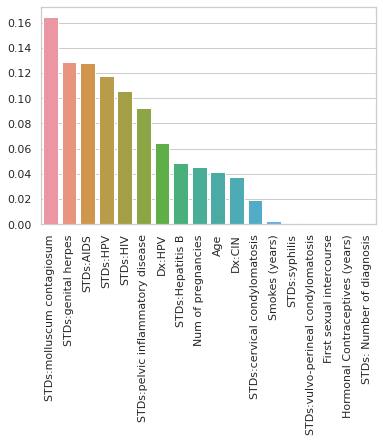

In [ ]:
best_est_rf = grid_search_result_rf.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_est_rf.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_rf[feature_names[i]] += best_est_rf.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print('Top 3 most important features for this trained tree:', feats[:3])

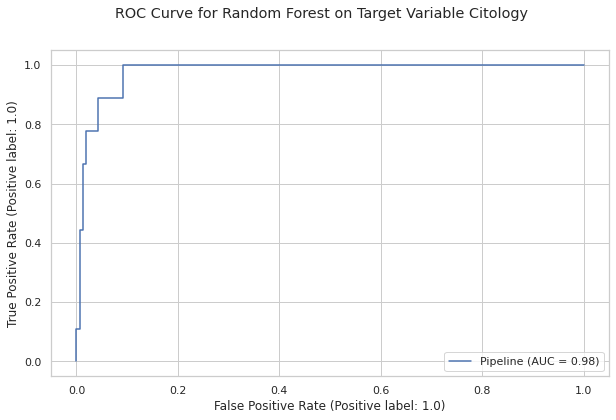

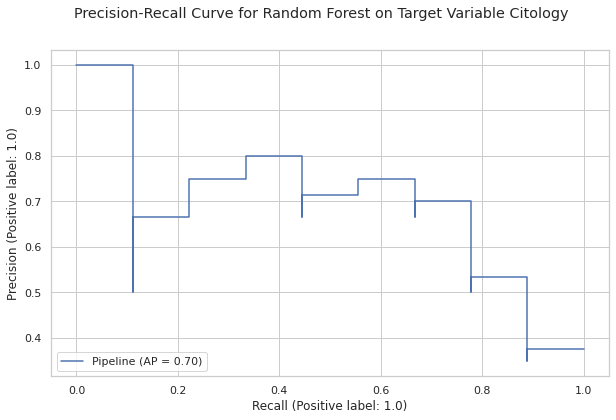

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for Random Forest on Target Variable Citology')
plot_roc_curve(pipe_rf, X_test_ci, y_test_ci, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for Random Forest on Target Variable Citology')
plot_precision_recall_curve(pipe_rf, X_test_ci, y_test_ci, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_ci, y_pred_rf).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_ci, y_pred_rf):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_ci, y_pred_rf, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_ci, y_pred_rf, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_ci, y_pred_rf, pos_label=1):0.4f}.")

accuracy on test set: 0.9709.
sensitivity on test set: 0.7778.
specificity on test set: 0.9816.
negative predictive accuracy(npa) on test set: 0.9877.
recall on test set: 0.7778.
precision on test set: 0.7000.
F1-score on test set: 0.7368.


In [ ]:
ci_roc = []
ci_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_ci, y_pred_prob)
ci_pr = []
ci_pr.append((rc,pr))

### Biopsy

In [ ]:
# Model Selection
pipe_rf = imb_make_pipeline(smote,
                            preprocess,
                            GridSearchCV(RandomForestClassifier(random_state=42),
                                         param_grid=rf_param_grid,
                                         cv=5, scoring="roc_auc")
                            )

pipe_rf.fit(X_dev_bi, y_dev_bi)

grid_search_result_rf = pipe_rf.named_steps['gridsearchcv']
best_params_rf = grid_search_result_rf.best_params_

print(f"Biopsy Random Forest Best parameters: {best_params_rf}")
print(f"Best dev set score: {grid_search_result_rf.best_score_}")

Biopsy Random Forest Best parameters: {'max_depth': 17, 'n_estimators': 100}
Best dev set score: 0.9917453972868217


In [ ]:
# Performance of the test dataset from the optimal models
y_pred_rf = pipe_rf.predict(X_test_bi)
print(f"Random forest test set score: {pipe_rf.score(X_test_bi, y_test_bi)}")

print(f"recall on test set: {recall_score(y_test_bi,y_pred_rf,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_bi,y_pred_rf,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_bi,y_pred_rf,pos_label=1):0.4f}.")

Random forest test set score: 0.9692264257481649
recall on test set: 0.7273.
precision on test set: 0.7273.
F1-score on test set: 0.7273.


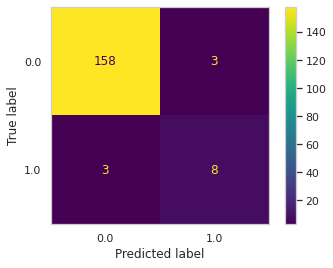

In [ ]:
plot_confusion_matrix(pipe_rf, X_test_bi, y_test_bi)

plt.grid(False)

In [ ]:
y_pred_prob = pipe_rf.predict_proba(X_test_bi)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bi, y_pred_prob, pos_label=1)
roc_auc_bi = auc(fpr, tpr)

print("AUC score: ", roc_auc_bi)

AUC score:  0.9692264257481649


defaultdict(<class 'float'>, {'Age': 0.31613073150890747, 'Number of sexual partners': 0.0, 'First sexual intercourse': 0.0065216661771488865, 'Num of pregnancies': 0.3598899793166003, 'Smokes (years)': 0.045826809993997505, 'Hormonal Contraceptives (years)': 0.001221936815541122, 'IUD (years)': 0.006229015864883999, 'STDs: Number of diagnosis': 0.0008902191606672396, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.3298308606068944, 'STDs:vaginal condylomatosis': 0.0015629012872368166, 'STDs:vulvo-perineal condylomatosis': 0.003708616025438624, 'STDs:syphilis': 0.06820375309216191, 'STDs:pelvic inflammatory disease': 0.6017303159540441, 'STDs:genital herpes': 0.7852784618682971, 'STDs:molluscum contagiosum': 0.7889213676320371, 'STDs:AIDS': 0.8443844996351603, 'STDs:HIV': 0.9676067890678572, 'STDs:Hepatitis B': 0.3062379621974905, 'STDs:HPV': 0.8001324389578247, 'Dx:CIN': 0.3150528422210781, 'Dx:HPV': 0.4506388326167329})
['Age', 'Number of sexual partners', 'First sexual

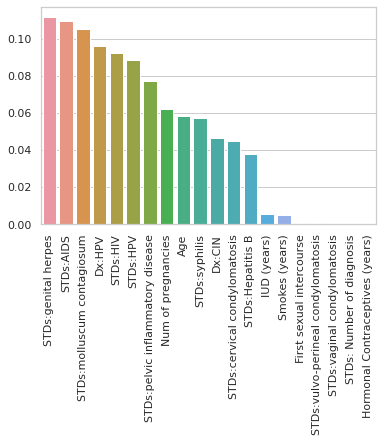

In [ ]:
best_est_rf = grid_search_result_rf.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_est_rf.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_rf[feature_names[i]] += best_est_rf.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print('Top 3 most important features for this trained tree:', feats[:3])

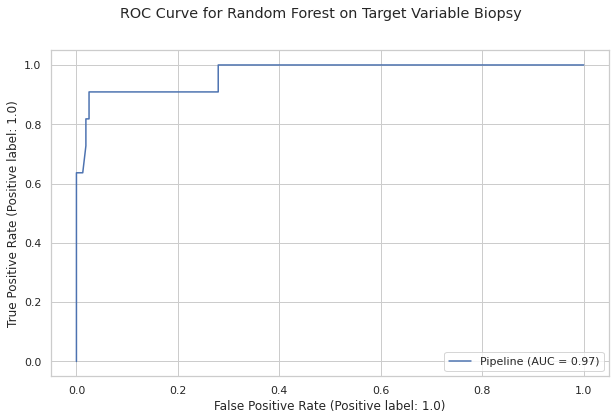

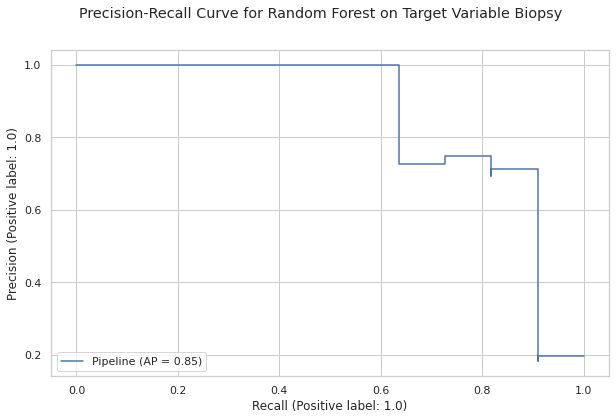

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for Random Forest on Target Variable Biopsy')
plot_roc_curve(pipe_rf, X_test_bi, y_test_bi, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for Random Forest on Target Variable Biopsy')
plot_precision_recall_curve(pipe_rf, X_test_bi, y_test_bi, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_bi, y_pred_rf).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_bi, y_pred_rf):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_bi, y_pred_rf, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_bi, y_pred_rf, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_bi, y_pred_rf, pos_label=1):0.4f}.")

accuracy on test set: 0.9651.
sensitivity on test set: 0.7273.
specificity on test set: 0.9814.
negative predictive accuracy(npa) on test set: 0.9814.
recall on test set: 0.7273.
precision on test set: 0.7273.
F1-score on test set: 0.7273.


In [ ]:
bi_roc = []
bi_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_bi, y_pred_prob)
bi_pr = []
bi_pr.append((rc,pr))

Here for random forest, as we can see that since the test set is highly imbalanced for all target classes, the model is not able to predict many of the minority samples correctly.

### Summary

Make an aggregated feature importance plot for random forests that averages over the target variables

Top 3 most important features for this trained tree: ('STDs:HIV', 'STDs:AIDS', 'STDs:HPV')


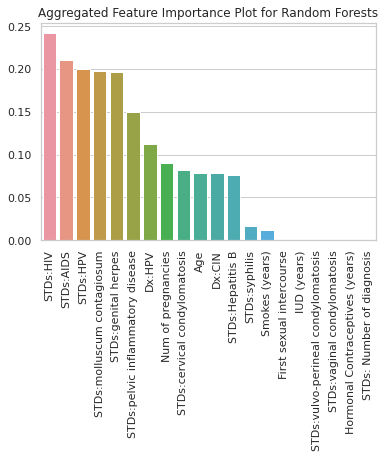

In [ ]:
feature_names = list(feat_imps_rf.keys())
feature_imps = list(feat_imps_rf.values())
feature_imps = [imp/4 for imp in feature_imps]

feat_imps = zip(feature_names, feature_imps)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
ax.set_title('Aggregated Feature Importance Plot for Random Forests')

print('Top 3 most important features for this trained tree:', feats[:3])

## Logistic Regression

In this section, we train an Logistic Regression model for each target variable. We use sklearn's LogisticRegression for the base model and we use sklearn.model_selection's GridSearchCV to determine the best parameters for our model.

In our GridSearchCV, we try the following values for the following variables:

n_estimators: [100, 500, 1000]
solver: ['newton-cg', 'lbfgs', 'liblinear']

We have used a 5-fold cross validation for our models in grid search.
Also, we would like to reduce the number of false negatives in our model because missing a cancerous cell can be dangerous. Here, cost of both false positives and false negatives can have different consequences though. Hence, when searching for the best parameters for our model, we rank those models by their AUC scores.

We test our models by using the test set for that target variable. We look at the accuracy, recall, precision, and F1-score of the model. We also plot the confusion matrix to visualize how our model is predicting the test data. Finally, we make graphs on the feature importances of features to see whether our models make sense intuitively.

Train an LogisticRegression model by tuning 2 hyperparameters (max_iter and solver) using 5 fold cross-validation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_param_grid = {'max_iter':[100, 500, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
feat_imps_lr = defaultdict(float)

### Hinselmann

In [ ]:
# Model Selection
pipe_lr = imb_make_pipeline(smote,
                preprocess,
                GridSearchCV(LogisticRegression(random_state=42),
                              param_grid=lr_param_grid,
                              cv=5, scoring="roc_auc")
                )

pipe_lr.fit(X_dev_hi, y_dev_hi)

grid_search_result_lr = pipe_lr.named_steps['gridsearchcv']
best_params_lr = grid_search_result_lr.best_params_

print(f"Best parameters: {best_params_lr}")
print(f"Best dev set score: {grid_search_result_lr.best_score_}")

Best parameters: {'max_iter': 100, 'solver': 'liblinear'}
Best dev set score: 0.7986352508429191


In [ ]:
# Performance of the test dataset from the optimal models
y_pred_lr = pipe_lr.predict(X_test_hi)
print(f"Logistic regression test set score: {pipe_lr.score(X_test_hi, y_test_hi)}")

print(f"recall on test set: {recall_score(y_test_hi, y_pred_lr, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_hi, y_pred_lr, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_hi, y_pred_lr, pos_label=1):0.4f}.")

Logistic regression test set score: 0.8580086580086579
recall on test set: 0.7143.
precision on test set: 0.2632.
F1-score on test set: 0.3846.


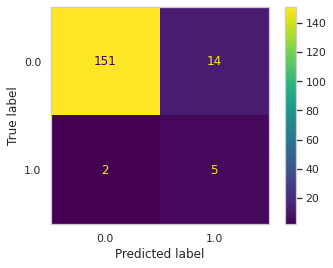

In [ ]:
plot_confusion_matrix(pipe_lr, X_test_hi, y_test_hi)

plt.grid(False)

In [ ]:
y_pred_prob = pipe_lr.predict_proba(X_test_hi)[:, 1]
fpr, tpr, _ = roc_curve(y_test_hi, y_pred_prob, pos_label=1)
roc_auc_hi = auc(fpr, tpr)

print("AUC score: ", roc_auc_hi)

AUC score:  0.8580086580086579


defaultdict(<class 'float'>, {'Age': 0.6795734579981435, 'Number of sexual partners': 0.0, 'First sexual intercourse': -0.9973575334179611, 'Num of pregnancies': 0.9476907225983723, 'Smokes (years)': -0.839469657725634, 'Hormonal Contraceptives (years)': -0.13830377895069718, 'IUD (years)': -0.22600405714791866, 'STDs: Number of diagnosis': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 2.7522632941524727, 'STDs:vaginal condylomatosis': -0.789621112583058, 'STDs:vulvo-perineal condylomatosis': -1.3492048951358704, 'STDs:syphilis': -1.4328964979876018, 'STDs:pelvic inflammatory disease': 3.1258807970910456, 'STDs:genital herpes': -2.2586796452659743, 'STDs:molluscum contagiosum': -2.205892089660243, 'STDs:AIDS': -1.5660857885812283, 'STDs:HIV': 2.4031629084652564, 'STDs:Hepatitis B': 1.0416313927701841, 'STDs:HPV': 0.7655000676228155, 'Dx:CIN': -1.336232730967292, 'Dx:HPV': -1.0226993722842432})
Top 3 most important features for this trained tree: ('STDs:pelvic inflamm

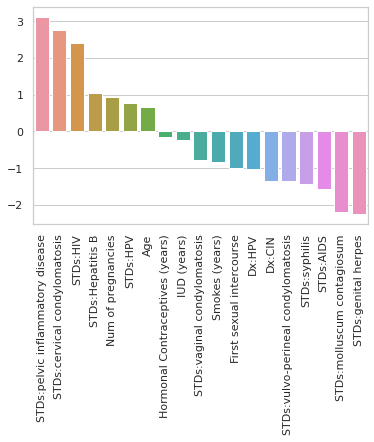

In [ ]:
best_est_lr = grid_search_result_lr.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_est_lr.coef_[0])
for i in range(len(feature_names)):
  feat_imps_lr[feature_names[i]] += best_est_lr.coef_[0][i]
print(feat_imps_lr)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print('Top 3 most important features for this trained tree:', feats[:3])

In [ ]:
# Shape of development and test features
print("Shape of test features: ", X_test_hi.shape)

# Number of positive and negative labels in undersampled development set
print("Positive labels (class 1) count: ", y_test_hi.value_counts()[1])
print("Negative labels (class 0) count: ", y_test_hi.value_counts()[0])

Shape of test features:  (172, 22)
Positive labels (class 1) count:  7
Negative labels (class 0) count:  165


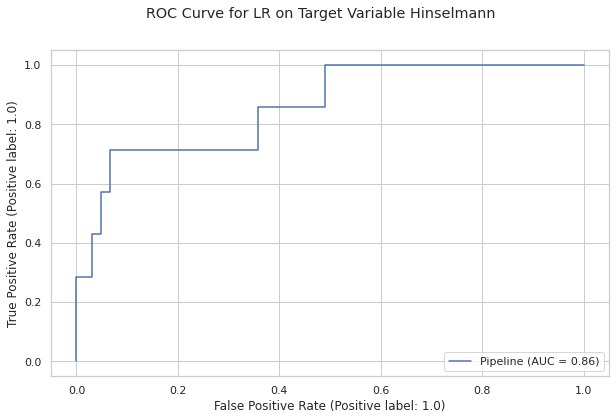

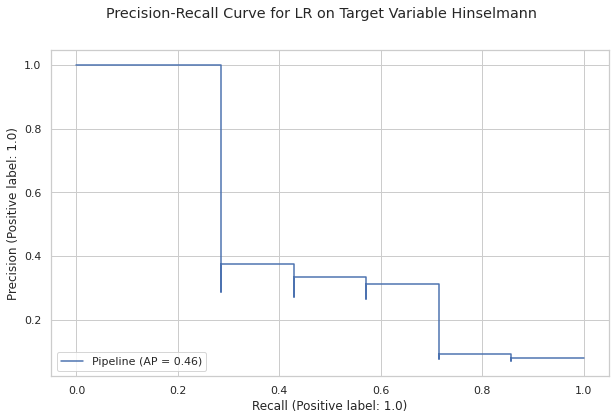

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, RocCurveDisplay, plot_roc_curve
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for LR on Target Variable Hinselmann')
plot_roc_curve(pipe_lr, X_test_hi, y_test_hi, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for LR on Target Variable Hinselmann')
plot_precision_recall_curve(pipe_lr, X_test_hi, y_test_hi, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_hi, y_pred_lr).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_hi, y_pred_lr):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_hi, y_pred_lr, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_hi, y_pred_lr, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_hi, y_pred_lr, pos_label=1):0.4f}.")

accuracy on test set: 0.9070.
sensitivity on test set: 0.7143.
specificity on test set: 0.9152.
negative predictive accuracy(npa) on test set: 0.9869.
recall on test set: 0.7143.
precision on test set: 0.2632.
F1-score on test set: 0.3846.


In [ ]:
hi_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_hi, y_pred_prob)
hi_pr.append((rc,pr))

### Schiller

In [ ]:
# Model Selection
pipe_lr = imb_make_pipeline(smote,
                preprocess,
                GridSearchCV(LogisticRegression(random_state=42),
                              param_grid=lr_param_grid,
                              cv=5, scoring="roc_auc")
                )

pipe_lr.fit(X_dev_sc, y_dev_sc)

grid_search_result_lr = pipe_lr.named_steps['gridsearchcv']
best_params_lr = grid_search_result_lr.best_params_

print(f"Best parameters: {best_params_lr}")
print(f"Best dev set score: {grid_search_result_lr.best_score_}")

Best parameters: {'max_iter': 100, 'solver': 'liblinear'}
Best dev set score: 0.7165128634920634


In [ ]:
# Performance of the test dataset from the optimal models
y_pred_lr = pipe_lr.predict(X_test_sc)
print(f"Logistic Regression test set score: {pipe_lr.score(X_test_sc, y_test_sc)}")

print(f"recall on test set: {recall_score(y_test_sc,y_pred_lr,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_sc,y_pred_lr,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_sc,y_pred_lr,pos_label=1):0.4f}.")

Logistic Regression test set score: 0.7707006369426752
recall on test set: 0.6667.
precision on test set: 0.2857.
F1-score on test set: 0.4000.


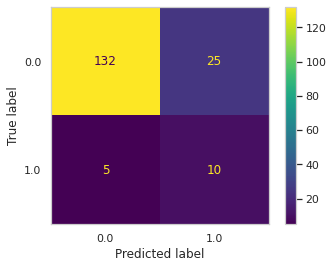

In [ ]:
plot_confusion_matrix(pipe_lr, X_test_sc, y_test_sc)

plt.grid(False)

In [ ]:
y_pred_prob = pipe_lr.predict_proba(X_test_sc)[:, 1]
fpr, tpr, _ = roc_curve(y_test_sc, y_pred_prob, pos_label=1)
roc_auc_sc = auc(fpr, tpr)

print("AUC score: ", roc_auc_sc)

AUC score:  0.7707006369426752


defaultdict(<class 'float'>, {'Age': 1.428625453404672, 'Number of sexual partners': 0.0, 'First sexual intercourse': -2.188616533927758, 'Num of pregnancies': 1.6967427180049008, 'Smokes (years)': -1.4734680405268743, 'Hormonal Contraceptives (years)': -0.4216452491488155, 'IUD (years)': -0.5126884302733596, 'STDs: Number of diagnosis': -0.3148715828501022, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 4.732539111885885, 'STDs:vaginal condylomatosis': -1.438193339542336, 'STDs:vulvo-perineal condylomatosis': -2.7328049340723117, 'STDs:syphilis': -1.7565609920800263, 'STDs:pelvic inflammatory disease': 5.638683854795197, 'STDs:genital herpes': -1.769534485040738, 'STDs:molluscum contagiosum': -2.905380099044808, 'STDs:AIDS': -2.901932181889105, 'STDs:HIV': 3.0057669241134333, 'STDs:Hepatitis B': 0.8223915327803784, 'STDs:HPV': 2.4429955656588356, 'Dx:CIN': -0.7309240972853898, 'Dx:HPV': -1.2116991295090898})
Top 3 most important features for this trained tree: ('STDs:pelv

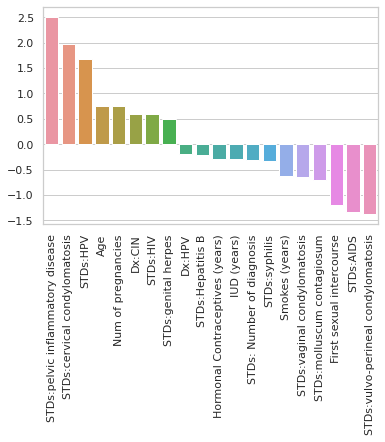

In [ ]:
best_est_lr = grid_search_result_lr.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_est_lr.coef_[0])
for i in range(len(feature_names)):
  feat_imps_lr[feature_names[i]] += best_est_lr.coef_[0][i]
print(feat_imps_lr)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print('Top 3 most important features for this trained tree:', feats[:3])

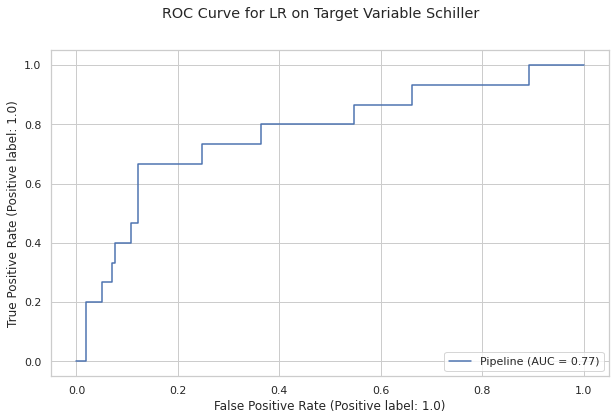

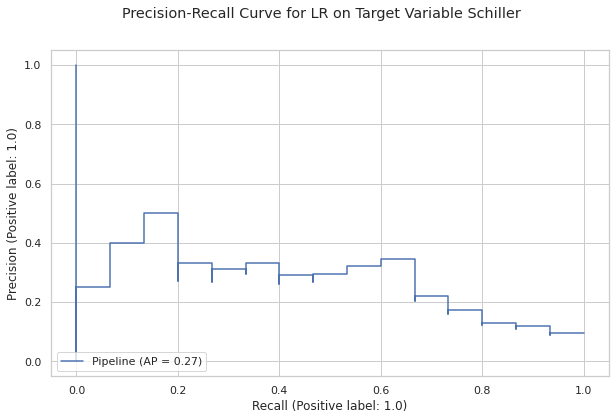

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for LR on Target Variable Schiller')
plot_roc_curve(pipe_lr, X_test_sc, y_test_sc, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for LR on Target Variable Schiller')
plot_precision_recall_curve(pipe_lr, X_test_sc, y_test_sc, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_sc, y_pred_lr).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_sc, y_pred_lr):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_sc, y_pred_lr, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_sc, y_pred_lr, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_sc, y_pred_lr, pos_label=1):0.4f}.")

accuracy on test set: 0.8256.
sensitivity on test set: 0.6667.
specificity on test set: 0.8408.
negative predictive accuracy(npa) on test set: 0.9635.
recall on test set: 0.6667.
precision on test set: 0.2857.
F1-score on test set: 0.4000.


In [ ]:
sc_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_sc, y_pred_prob)
sc_pr.append((rc,pr))

### Citology

In [ ]:
# Model Selection
pipe_lr = imb_make_pipeline(smote,
                preprocess,
                GridSearchCV(LogisticRegression(random_state=42),
                              param_grid=lr_param_grid,
                              cv=5, scoring="roc_auc")
                )

pipe_lr.fit(X_dev_ci, y_dev_ci)

grid_search_result_rf = pipe_lr.named_steps['gridsearchcv']
best_params_lr = grid_search_result_lr.best_params_

print(f"Best parameters: {best_params_lr}")
print(f"Best dev set score: {grid_search_result_lr.best_score_}")

Best parameters: {'max_iter': 100, 'solver': 'liblinear'}
Best dev set score: 0.7165128634920634


In [ ]:
# Performance of the test dataset from the optimal models
y_pred_lr = pipe_lr.predict(X_test_ci)
print(f"Logistic Regression test set score: {pipe_lr.score(X_test_ci, y_test_ci)}")

print(f"recall on test set: {recall_score(y_test_ci, y_pred_lr,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_ci, y_pred_lr,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_ci, y_pred_lr,pos_label=1):0.4f}.")

Logistic Regression test set score: 0.6680299931833674
recall on test set: 0.4444.
precision on test set: 0.1111.
F1-score on test set: 0.1778.


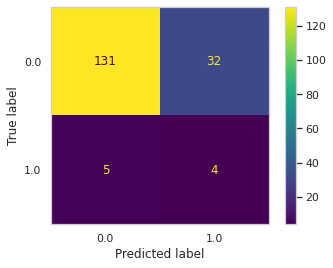

In [ ]:
plot_confusion_matrix(pipe_lr, X_test_ci, y_test_ci)

plt.grid(False)

In [ ]:
y_pred_prob = pipe_lr.predict_proba(X_test_ci)[:, 1]
fpr, tpr, _ = roc_curve(y_test_ci, y_pred_prob, pos_label=1)
roc_auc_ci = auc(fpr, tpr)

print("AUC score: ", roc_auc_ci)

AUC score:  0.6680299931833674


Top 3 most important features for this trained tree: ('STDs:pelvic inflammatory disease', 'STDs:cervical condylomatosis', 'STDs:HPV')


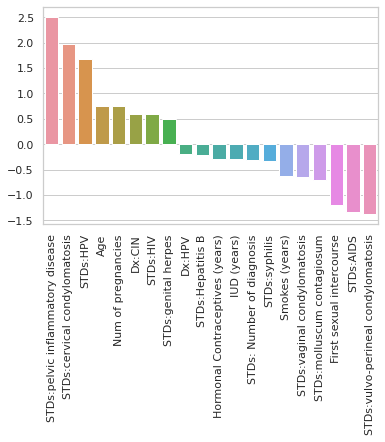

In [ ]:
best_est_lr = grid_search_result_lr.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_est_lr.coef_[0])
for i in range(len(feature_names)):
  feat_imps_lr[feature_names[i]] += best_est_lr.coef_[0][i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print('Top 3 most important features for this trained tree:', feats[:3])

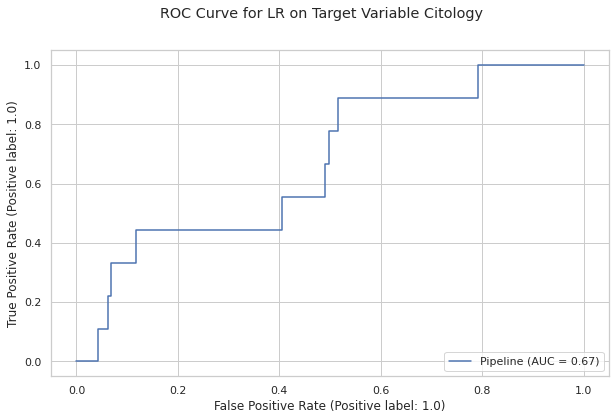

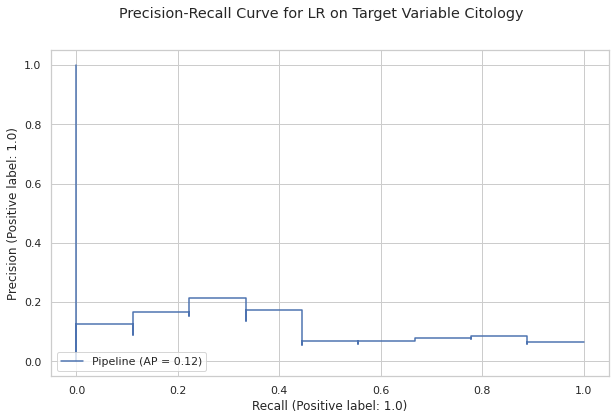

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for LR on Target Variable Citology')
plot_roc_curve(pipe_lr, X_test_ci, y_test_ci, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for LR on Target Variable Citology')
plot_precision_recall_curve(pipe_lr, X_test_ci, y_test_ci, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_ci, y_pred_lr).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_ci, y_pred_lr):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_ci, y_pred_lr, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_ci, y_pred_lr, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_ci, y_pred_lr, pos_label=1):0.4f}.")

accuracy on test set: 0.7849.
sensitivity on test set: 0.4444.
specificity on test set: 0.8037.
negative predictive accuracy(npa) on test set: 0.9632.
recall on test set: 0.4444.
precision on test set: 0.1111.
F1-score on test set: 0.1778.


In [ ]:
ci_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_ci, y_pred_prob)
ci_pr.append((rc,pr))

### Biopsy

In [ ]:
# Model Selection
pipe_lr = imb_make_pipeline(smote,
              preprocess,
              GridSearchCV(LogisticRegression(random_state=42),
                            param_grid=lr_param_grid,
                            cv=5, scoring="roc_auc")
                            )

pipe_lr.fit(X_dev_bi, y_dev_bi)

grid_search_result_lr = pipe_lr.named_steps['gridsearchcv']
best_params_lr = grid_search_result_lr.best_params_

print(f"Best parameters: {best_params_lr}")
print(f"Best dev set score: {grid_search_result_lr.best_score_}")

Best parameters: {'max_iter': 100, 'solver': 'newton-cg'}
Best dev set score: 0.803203730620155


In [ ]:
# Performance of the test dataset from the optimal models
y_pred_lr = pipe_lr.predict(X_test_bi)
print(f"Logistic Regression test set score: {pipe_lr.score(X_test_bi, y_test_bi)}")

print(f"recall on test set: {recall_score(y_test_bi,y_pred_lr,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_bi,y_pred_lr,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_bi,y_pred_lr,pos_label=1):0.4f}.")

Logistic Regression test set score: 0.7041219649915301
recall on test set: 0.2727.
precision on test set: 0.1500.
F1-score on test set: 0.1935.


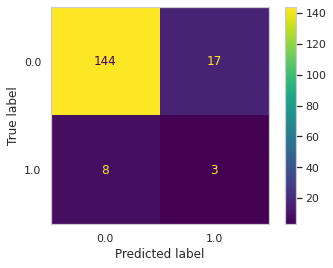

In [ ]:
plot_confusion_matrix(pipe_lr, X_test_bi, y_test_bi)

plt.grid(False)

In [ ]:
y_pred_prob = pipe_lr.predict_proba(X_test_bi)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bi, y_pred_prob, pos_label=1)
roc_auc_bi = auc(fpr, tpr)

print("AUC score: ", roc_auc_bi)

AUC score:  0.7041219649915301


Top 3 most important features for this trained tree: ('STDs:syphilis', 'STDs:pelvic inflammatory disease', 'IUD (years)')


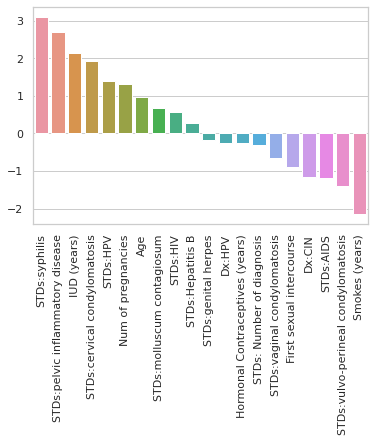

In [ ]:
best_est_lr = grid_search_result_lr.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_est_lr.coef_[0])
for i in range(len(feature_names)):
  feat_imps_lr[feature_names[i]] += best_est_lr.coef_[0][i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)

print('Top 3 most important features for this trained tree:', feats[:3])

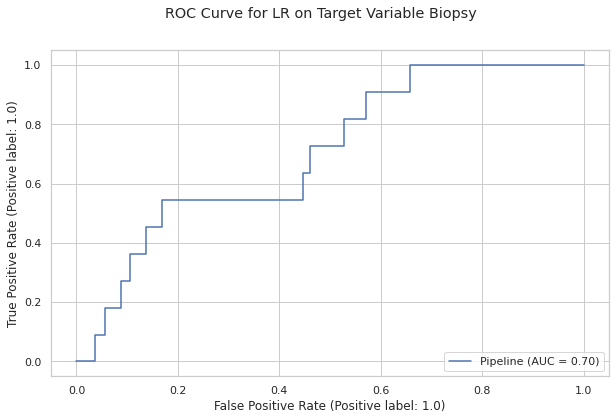

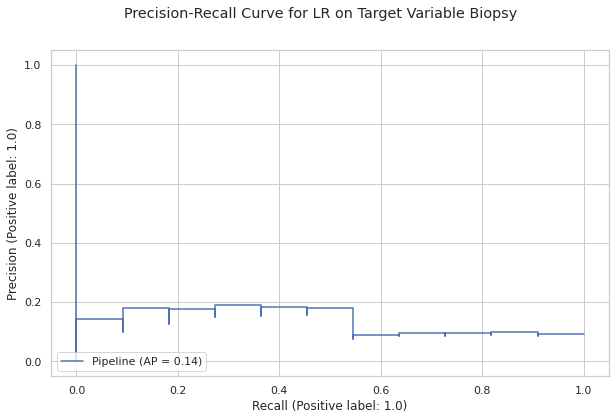

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for LR on Target Variable Biopsy')
plot_roc_curve(pipe_lr, X_test_bi, y_test_bi, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for LR on Target Variable Biopsy')
plot_precision_recall_curve(pipe_lr, X_test_bi, y_test_bi, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_bi, y_pred_lr).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_bi, y_pred_lr):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_bi, y_pred_lr, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_bi, y_pred_lr, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_bi, y_pred_lr, pos_label=1):0.4f}.")

accuracy on test set: 0.8547.
sensitivity on test set: 0.2727.
specificity on test set: 0.8944.
negative predictive accuracy(npa) on test set: 0.9474.
recall on test set: 0.2727.
precision on test set: 0.1500.
F1-score on test set: 0.1935.


These Logistic Regression models perform poorly as compared to the Random Forest models.

In [ ]:
bi_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_bi, y_pred_prob)
bi_pr.append((rc,pr))

### Summary


Make an aggregated feature importance plot for Logitic Regression that averages over the target variables

Top 3 most important features for this trained tree: ('STDs:pelvic inflammatory disease', 'STDs:cervical condylomatosis', 'STDs:HPV')


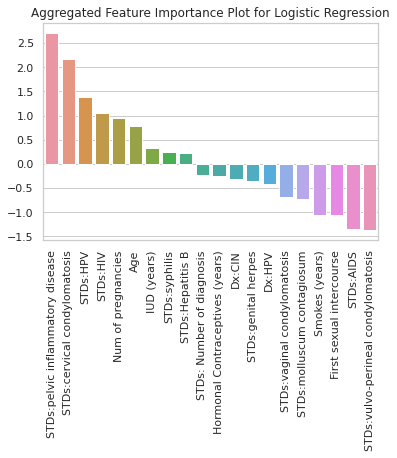

In [ ]:
feature_names = list(feat_imps_lr.keys())
feature_imps = list(feat_imps_lr.values())
feature_imps = [imp/4 for imp in feature_imps]

feat_imps = zip(feature_names, feature_imps)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
ax.set_title('Aggregated Feature Importance Plot for Logistic Regression')

print('Top 3 most important features for this trained tree:', feats[:3])

## XGBoost

In this section, we train an XGBoost model for each target variable. We use xgboost's XGBClassifier for the base model and we use sklearn.model_selection's GridSearchCV to determine the best parameters for our model. In our GridSearchCV, we try the following values for the following variables:

n_estimators: [100, 150, 200] \
learning_rate:[0.01, 0.1, 1] \
'max_depth': [7, 9, 11]}] \

Also, we would like to reduce the number of false negatives in our model because missing a cancerous cell can be dangerous. Here, cost of both false positives and false negatives can have different consequences though. Hence, when searching for the best parameters for our model, we rank those models by their AUC scores.

We test our models by using the test set for that target variable. We look at the accuracy, recall, precision, and F1-score of the model. We also plot the confusion matrix to visualize how our model is predicting the test data. Finally, we make graphs on the feature importances of features to see whether our models make sense intuitively.

Train an XGBoost model by tuning 3 hyperparameters (number of trees, learning rate and max depth) using 5 fold cross-validation

In [ ]:
feat_imps_xgb = defaultdict(float)

### Hinselmann

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Model Selection
pipe_xgb = imb_make_pipeline(smote, preprocess, GridSearchCV(XGBClassifier(random_state=42, eval_metric = 'logloss'),
                    param_grid=[{'n_estimators':[100, 150, 200],
                          'learning_rate':[0.01, 0.1, 1],
                          'max_depth': [7, 9, 11]}],
                    cv=5, scoring="roc_auc"))

# pipe_xgb = imb_make_pipeline(preprocess, smote, XGBClassifier())
# scores = cross_validate(pipe_xgb, X_dev_hi, y_dev_hi, cv=5, scoring=['roc_auc', 'recall', 'f1'], return_estimator=True)
# scores['test_roc_auc'].mean(), scores['test_recall'].mean(), scores['test_f1'].mean()

pipe_xgb.fit(X_dev_hi, y_dev_hi)
grid_search_result_xgb = pipe_xgb.named_steps['gridsearchcv']
best_params = grid_search_result_xgb.best_params_
print(f"best parameters: {best_params}")
print(f"best dev set score: {grid_search_result_xgb.best_score_}")

best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
best dev set score: 0.9948645020643632


Test the model using best parameters on the test set

In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score

# Performance of the test dataset from the optimal models

y_pred_xgb = pipe_xgb.predict(X_test_hi)
print(f"accuracy on test set: {pipe_xgb.score(X_test_hi,y_test_hi)}")
print(f"recall on test set: {recall_score(y_test_hi,y_pred_xgb,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_hi,y_pred_xgb,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_hi,y_pred_xgb,pos_label=1):0.4f}.")

accuracy on test set: 0.9753246753246754
recall on test set: 0.7143.
precision on test set: 0.8333.
F1-score on test set: 0.7692.


In the case of predicting cervical cancer, it is crucial to reduce our count of false negatives in our model because a false negative in production could represent telling a patient they are not at risk when they are actually at high risk for cervical cancer. Because maximizing precision minimizes false positives and maximizing recall minimizes false negatives, we should use recall as our prioritized metric when comparing the performance of different models.

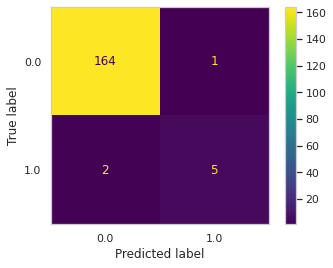

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe_xgb, X_test_hi, y_test_hi)
plt.grid(False)

# model = XGBClassifier(n_estimators=best_params['n_estimators'], 
#                       learning_rate=best_params['learning_rate'], 
#                       max_depth=best_params['max_depth']).fit(X_dev_hi, y_dev_hi)
# plot_confusion_matrix(model, X_test_hi, y_test_hi)
# plt.grid(False)

In [ ]:
y_pred_prob = pipe_xgb.predict_proba(X_test_hi)[:, 1]
fpr, tpr, _ = roc_curve(y_test_hi, y_pred_prob, pos_label=1)
roc_auc_hi = auc(fpr, tpr)

print("AUC score: ", roc_auc_hi)

AUC score:  0.9753246753246754


List the top 3 features from the trained XGBoost model

Top 3 most important features for this trained tree: ('STDs:cervical condylomatosis', 'STDs:pelvic inflammatory disease', 'STDs:HIV')


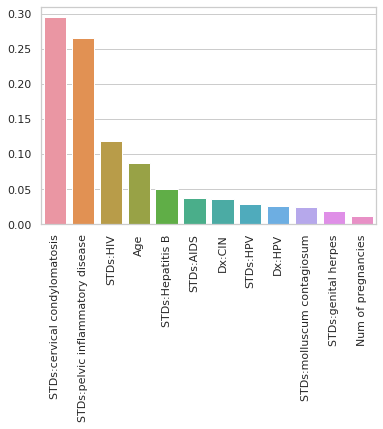

In [ ]:
grid_search_result_xgb = pipe_xgb.named_steps['gridsearchcv']
best_xgb = grid_search_result_xgb.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_xgb.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_xgb[feature_names[i]] += best_xgb.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
print('Top 3 most important features for this trained tree:', feats[:3])


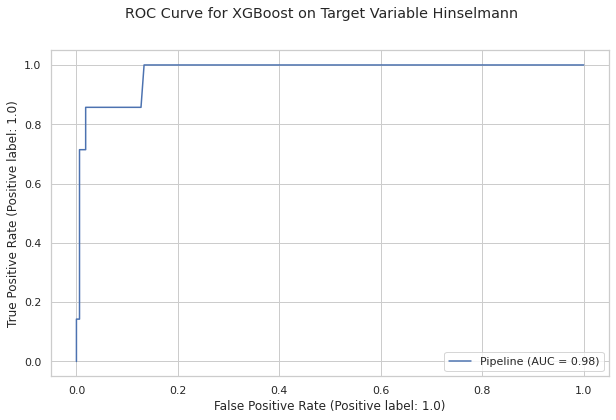

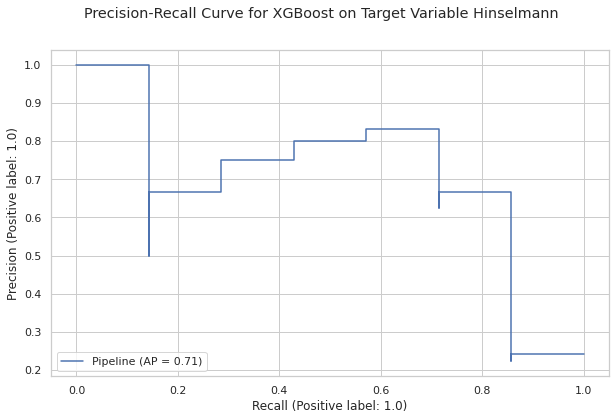

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, RocCurveDisplay, plot_roc_curve
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for XGBoost on Target Variable Hinselmann')
plot_roc_curve(pipe_xgb, X_test_hi, y_test_hi, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for XGBoost on Target Variable Hinselmann')
plot_precision_recall_curve(pipe_xgb, X_test_hi, y_test_hi, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_hi, y_pred_xgb).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_hi, y_pred_xgb):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_hi, y_pred_xgb, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_hi, y_pred_xgb, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_hi, y_pred_xgb, pos_label=1):0.4f}.")

accuracy on test set: 0.9826.
sensitivity on test set: 0.7143.
specificity on test set: 0.9939.
negative predictive accuracy(npa) on test set: 0.9880.
recall on test set: 0.7143.
precision on test set: 0.8333.
F1-score on test set: 0.7692.


In [ ]:
hi_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_hi, y_pred_prob)
hi_pr.append((rc,pr))

### Schiller

In [ ]:
# Model Selection
pipe_xgb = imb_make_pipeline(smote, preprocess, GridSearchCV(XGBClassifier(random_state=42, eval_metric = 'logloss'),
                    param_grid=[{'n_estimators':[100, 150, 200],
                          'learning_rate':[0.01, 0.1, 1],
                          'max_depth': [7, 9, 11]}],
                    cv=5, scoring="roc_auc"))
pipe_xgb.fit(X_dev_sc, y_dev_sc)
grid_search_result_xgb = pipe_xgb.named_steps['gridsearchcv']
best_params = grid_search_result_xgb.best_params_
print(f"best parameters: {best_params}")
print(f"best dev set score: {grid_search_result_xgb.best_score_}")

best parameters: {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 200}
best dev set score: 0.9829365333333333


accuracy on test set: 0.9023354564755839
recall on test set: 0.7333.
precision on test set: 0.5789.
F1-score on test set: 0.6471.


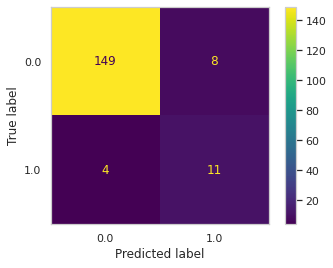

Top 3 most important features for this trained tree: ('STDs:syphilis', 'Age', 'Dx:HPV')


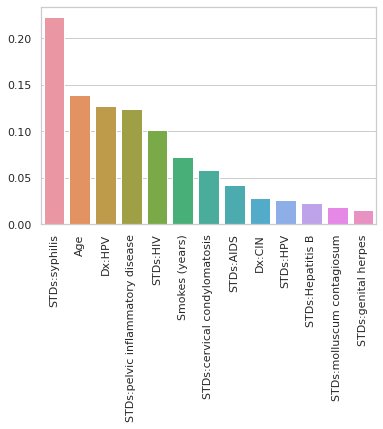

In [ ]:
# Performance of the test dataset from the optimal models
y_pred_xgb = pipe_xgb.predict(X_test_sc)
print(f"accuracy on test set: {pipe_xgb.score(X_test_sc,y_test_sc)}")
print(f"recall on test set: {recall_score(y_test_sc,y_pred_xgb,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_sc,y_pred_xgb,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_sc,y_pred_xgb,pos_label=1):0.4f}.")

plot_confusion_matrix(pipe_xgb, X_test_sc, y_test_sc)
plt.grid(False)
plt.show()

grid_search_result_xgb = pipe_xgb.named_steps['gridsearchcv']
best_xgb = grid_search_result_xgb.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_xgb.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_xgb[feature_names[i]] += best_xgb.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
print('Top 3 most important features for this trained tree:', feats[:3])
plt.show()

In [ ]:
y_pred_prob = pipe_xgb.predict_proba(X_test_sc)[:, 1]
fpr, tpr, _ = roc_curve(y_test_sc, y_pred_prob, pos_label=1)
roc_auc_sc = auc(fpr, tpr)

print("AUC score: ", roc_auc_sc)

AUC score:  0.9023354564755839


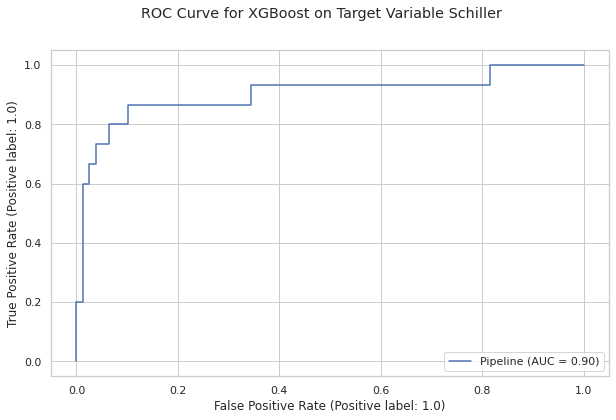

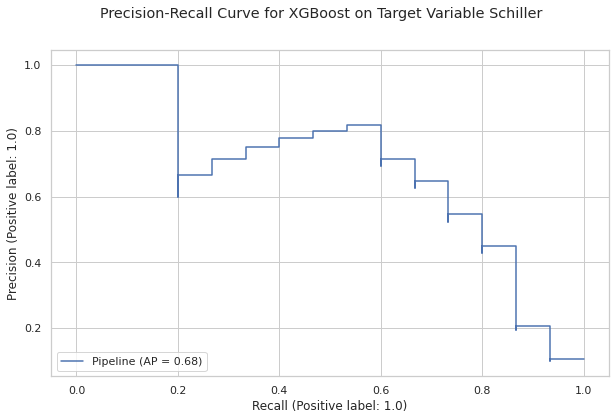

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for XGBoost on Target Variable Schiller')
plot_roc_curve(pipe_xgb, X_test_sc, y_test_sc, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for XGBoost on Target Variable Schiller')
plot_precision_recall_curve(pipe_xgb, X_test_sc, y_test_sc, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_sc, y_pred_xgb).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_sc, y_pred_xgb):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_sc, y_pred_xgb, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_sc, y_pred_xgb, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_sc, y_pred_xgb, pos_label=1):0.4f}.")

accuracy on test set: 0.9302.
sensitivity on test set: 0.7333.
specificity on test set: 0.9490.
negative predictive accuracy(npa) on test set: 0.9739.
recall on test set: 0.7333.
precision on test set: 0.5789.
F1-score on test set: 0.6471.


In [ ]:
sc_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_sc, y_pred_prob)
sc_pr.append((rc,pr))

### Citology

In [ ]:
# Model Selection
pipe_xgb = imb_make_pipeline(smote, preprocess, GridSearchCV(XGBClassifier(random_state=42, eval_metric = 'logloss'),
                    param_grid=[{'n_estimators':[100, 150, 200],
                          'learning_rate':[0.01, 0.1, 1],
                          'max_depth': [7, 9, 11]}],
                    cv=5, scoring="roc_auc"))
pipe_xgb.fit(X_dev_ci, y_dev_ci)
grid_search_result_xgb = pipe_xgb.named_steps['gridsearchcv']
best_params = grid_search_result_xgb.best_params_
print(f"best parameters: {best_params}")
print(f"best dev set score: {grid_search_result_xgb.best_score_}")

best parameters: {'learning_rate': 1, 'max_depth': 9, 'n_estimators': 200}
best dev set score: 0.9902047066263154


accuracy on test set: 0.940013633265167
recall on test set: 0.7778.
precision on test set: 0.5385.
F1-score on test set: 0.6364.


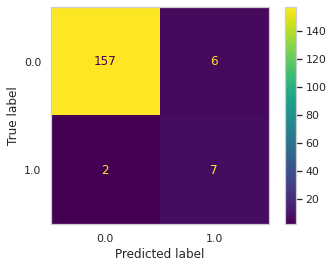

Top 3 most important features for this trained tree: ('Dx:HPV', 'STDs:pelvic inflammatory disease', 'STDs:cervical condylomatosis')


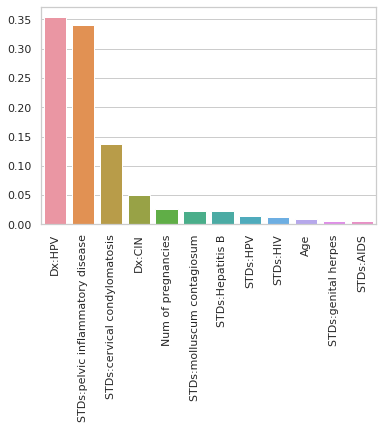

In [ ]:
# Performance of the test dataset from the optimal models
y_pred_xgb = pipe_xgb.predict(X_test_ci)
print(f"accuracy on test set: {pipe_xgb.score(X_test_ci,y_test_ci)}")
print(f"recall on test set: {recall_score(y_test_ci,y_pred_xgb,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_ci,y_pred_xgb,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_ci,y_pred_xgb,pos_label=1):0.4f}.")

plot_confusion_matrix(pipe_xgb, X_test_ci, y_test_ci)
plt.grid(False)
plt.show()

grid_search_result_xgb = pipe_xgb.named_steps['gridsearchcv']
best_xgb = grid_search_result_xgb.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_xgb.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_xgb[feature_names[i]] += best_xgb.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
print('Top 3 most important features for this trained tree:', feats[:3])
plt.show()

In [ ]:
y_pred_prob = pipe_xgb.predict_proba(X_test_ci)[:, 1]
fpr, tpr, _ = roc_curve(y_test_ci, y_pred_prob, pos_label=1)
roc_auc_ci = auc(fpr, tpr)

print("AUC score: ", roc_auc_ci)

AUC score:  0.940013633265167


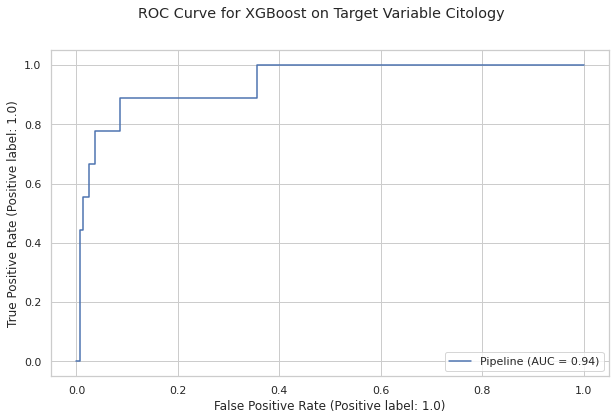

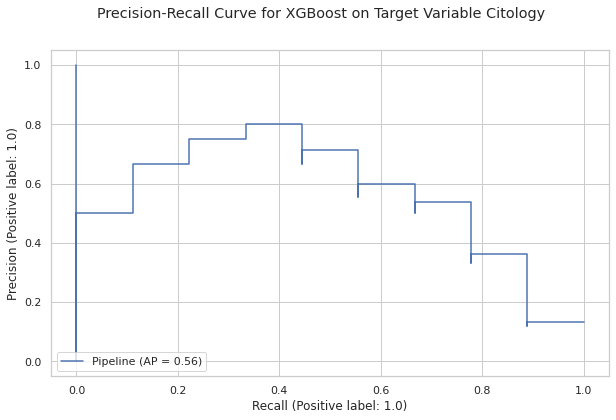

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for XGBoost on Target Variable Citology')
plot_roc_curve(pipe_xgb, X_test_ci, y_test_ci, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for XGBoost on Target Variable Citology')
plot_precision_recall_curve(pipe_xgb, X_test_ci, y_test_ci, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_ci, y_pred_xgb).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_ci, y_pred_xgb):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_ci, y_pred_xgb, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_ci, y_pred_xgb, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_ci, y_pred_xgb, pos_label=1):0.4f}.")

accuracy on test set: 0.9535.
sensitivity on test set: 0.7778.
specificity on test set: 0.9632.
negative predictive accuracy(npa) on test set: 0.9874.
recall on test set: 0.7778.
precision on test set: 0.5385.
F1-score on test set: 0.6364.


In [ ]:
ci_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_ci, y_pred_prob)
ci_pr.append((rc,pr))

### Biopsy

In [ ]:
# Model Selection
pipe_xgb = imb_make_pipeline(smote, preprocess, GridSearchCV(XGBClassifier(random_state=42, eval_metric = 'logloss'),
                    param_grid=[{'n_estimators':[100, 150, 200],
                          'learning_rate':[0.01, 0.1, 1],
                          'max_depth': [7, 9, 11]}],
                    cv=5, scoring="roc_auc"))
pipe_xgb.fit(X_dev_bi, y_dev_bi)
grid_search_result_xgb = pipe_xgb.named_steps['gridsearchcv']
best_params = grid_search_result_xgb.best_params_
print(f"best parameters: {best_params}")
print(f"best dev set score: {grid_search_result_xgb.best_score_}")

best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
best dev set score: 0.9861191860465116


accuracy on test set: 0.9768492377188029
recall on test set: 0.6364.
precision on test set: 0.7000.
F1-score on test set: 0.6667.


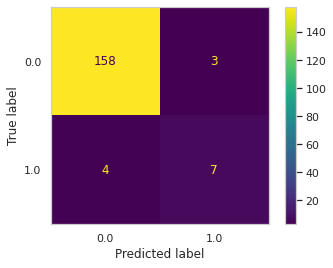

Top 3 most important features for this trained tree: ('Dx:HPV', 'STDs:pelvic inflammatory disease', 'STDs:syphilis')


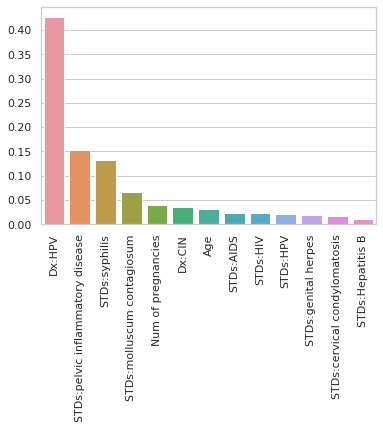

In [ ]:
# Performance of the test dataset from the optimal models
y_pred_xgb = pipe_xgb.predict(X_test_bi)
print(f"accuracy on test set: {pipe_xgb.score(X_test_bi,y_test_bi)}")
print(f"recall on test set: {recall_score(y_test_bi,y_pred_xgb,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_bi,y_pred_xgb,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_bi,y_pred_xgb,pos_label=1):0.4f}.")

plot_confusion_matrix(pipe_xgb, X_test_bi, y_test_bi)
plt.grid(False)
plt.show()

grid_search_result_xgb = pipe_xgb.named_steps['gridsearchcv']
best_xgb = grid_search_result_xgb.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_xgb.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_xgb[feature_names[i]] += best_xgb.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
print('Top 3 most important features for this trained tree:', feats[:3])
plt.show()

In [ ]:
y_pred_prob = pipe_xgb.predict_proba(X_test_bi)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bi, y_pred_prob, pos_label=1)
roc_auc_bi = auc(fpr, tpr)

print("AUC score: ", roc_auc_bi)

AUC score:  0.9768492377188029


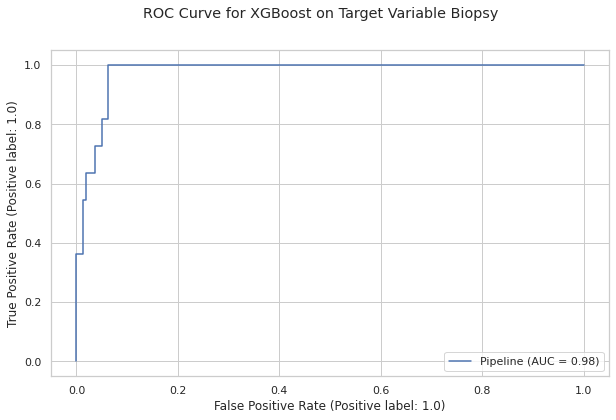

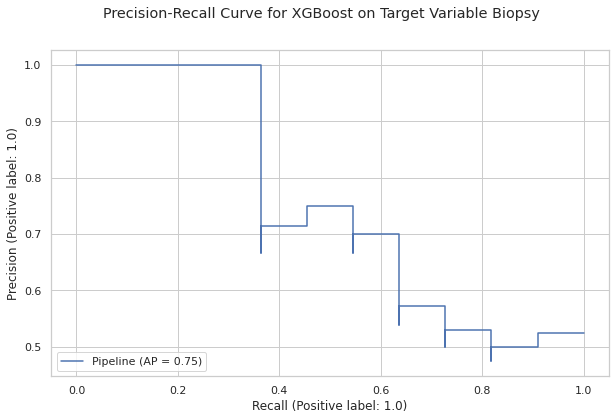

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for XGBoost on Target Variable Biopsy')
plot_roc_curve(pipe_xgb, X_test_bi, y_test_bi, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for XGBoost on Target Variable Biopsy')
plot_precision_recall_curve(pipe_xgb, X_test_bi, y_test_bi, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_bi, y_pred_xgb).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_bi, y_pred_xgb):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_bi, y_pred_xgb, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_bi, y_pred_xgb, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_bi, y_pred_xgb, pos_label=1):0.4f}.")

accuracy on test set: 0.9593.
sensitivity on test set: 0.6364.
specificity on test set: 0.9814.
negative predictive accuracy(npa) on test set: 0.9753.
recall on test set: 0.6364.
precision on test set: 0.7000.
F1-score on test set: 0.6667.


In [ ]:
bi_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_bi, y_pred_prob)
bi_pr.append((rc,pr))

### Summary

Make an aggregated feature importance plot for XGBoost that averages over the target variables

Top 3 most important features for this trained tree: ('Dx:HPV', 'STDs:pelvic inflammatory disease', 'STDs:cervical condylomatosis')


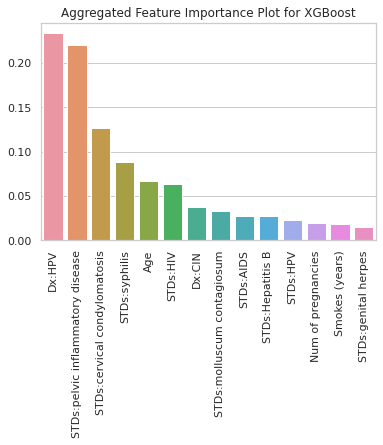

In [ ]:
feature_names = list(feat_imps_xgb.keys())
feature_imps = list(feat_imps_xgb.values())
feature_imps = [imp/4 for imp in feature_imps]

feat_imps = zip(feature_names, feature_imps)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
ax.set_title('Aggregated Feature Importance Plot for XGBoost')

print('Top 3 most important features for this trained tree:', feats[:3])

## AdaBoost

In this section, we train an AdaBoost model for each target variable. We use sklearn.ensemble's AdaBoostClassifier for the base model and we use sklearn.model_selection's GridSearchCV to determine the best parameters for our model. In our GridSearchCV, we try the following values for the following variables:

- n_estimators: [50, 100, 150, 200]
- learning_rate:[0.01, 0.1, 1]


Also, we would like to reduce the number of false negatives in our model because missing a cancerous cell can be dangerous. Here, cost of both false positives and false negatives can have different consequences though. Hence, when searching for the best parameters for our model, we rank those models by their AUC scores.

We test our models by using the test set for that target variable. We look at the accuracy, recall, precision, and F1-score of the model. We also plot the confusion matrix to visualize how our model is predicting the test data. Finally, we make graphs on the feature importances of features to see whether our models make sense intuitively. 

In [ ]:
feat_imps_ada = defaultdict(float)

### Hinselmann

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Model Selection
pipe_ada = imb_make_pipeline(smote, preprocess, GridSearchCV(AdaBoostClassifier(random_state=42),
                    param_grid=[{'n_estimators':[50, 100, 150, 200],
                          'learning_rate':[0.01, 0.1, 1]}],
                    cv=5, scoring="roc_auc"))

pipe_ada.fit(X_dev_sc, y_dev_sc)
grid_search_result_ada = pipe_ada.named_steps['gridsearchcv']
best_params = grid_search_result_ada.best_params_
print(f"best parameters: {best_params}")
print(f"best dev set score: {grid_search_result_ada.best_score_}")

best parameters: {'learning_rate': 1, 'n_estimators': 100}
best dev set score: 0.9618338031746031


In [ ]:
y_pred_ada = pipe_ada.predict(X_test_hi)
print(f"AdaBoost test set score: {pipe_ada.score(X_test_hi, y_test_hi)}")

print(f"recall on test set: {recall_score(y_test_hi, y_pred_ada, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_hi, y_pred_ada, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_hi, y_pred_ada, pos_label=1):0.4f}.")

AdaBoost test set score: 0.7688311688311689
recall on test set: 0.2857.
precision on test set: 0.2857.
F1-score on test set: 0.2857.


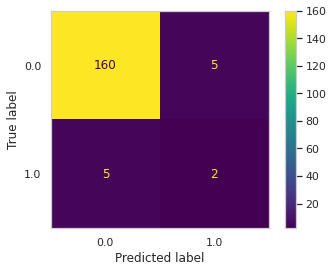

In [ ]:
plot_confusion_matrix(pipe_ada, X_test_hi, y_test_hi)
plt.grid(False)

In [ ]:
y_pred_prob = pipe_ada.predict_proba(X_test_hi)[:, 1]
fpr, tpr, _ = roc_curve(y_test_hi, y_pred_prob, pos_label=1)
roc_auc_hi = auc(fpr, tpr)

print("AUC score: ", roc_auc_hi)

AUC score:  0.7688311688311689


Top 3 most important features for this trained tree: ('STDs:HIV', 'STDs:molluscum contagiosum', 'STDs:AIDS')


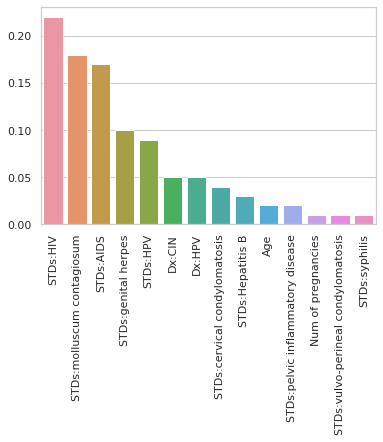

In [ ]:
grid_search_result_ada = pipe_ada.named_steps['gridsearchcv']
best_ada = grid_search_result_ada.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_ada.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_ada[feature_names[i]] += best_ada.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))

ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
print('Top 3 most important features for this trained tree:', feats[:3])

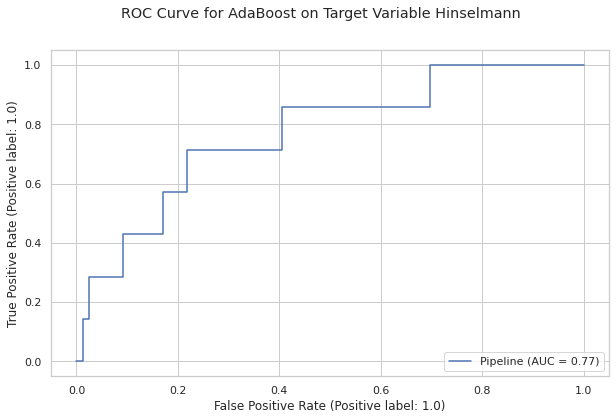

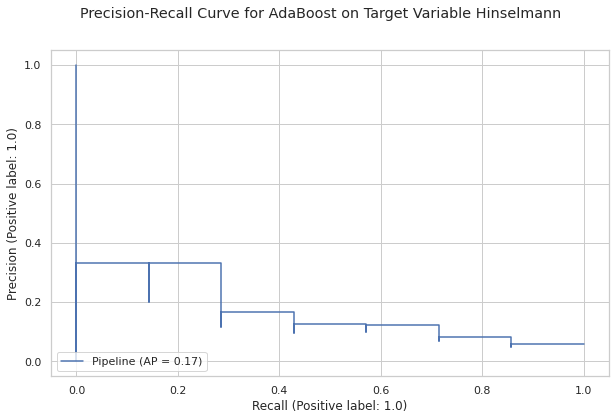

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for AdaBoost on Target Variable Hinselmann')
plot_roc_curve(pipe_ada, X_test_hi, y_test_hi, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for AdaBoost on Target Variable Hinselmann')
plot_precision_recall_curve(pipe_ada, X_test_hi, y_test_hi, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_hi, y_pred_ada).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_hi, y_pred_ada):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_hi, y_pred_ada, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_hi, y_pred_ada, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_hi, y_pred_ada, pos_label=1):0.4f}.")

accuracy on test set: 0.9419.
sensitivity on test set: 0.2857.
specificity on test set: 0.9697.
negative predictive accuracy(npa) on test set: 0.9697.
recall on test set: 0.2857.
precision on test set: 0.2857.
F1-score on test set: 0.2857.


In [ ]:
hi_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_hi, y_pred_prob)
hi_pr.append((rc,pr))

### Schiller

In [ ]:
# Model Selection
pipe_ada = imb_make_pipeline(smote, preprocess, GridSearchCV(AdaBoostClassifier(random_state=42),
                    param_grid=[{'n_estimators':[50, 100, 150, 200],
                          'learning_rate':[0.01, 0.1, 1]}],
                    cv=5, scoring="roc_auc"))
pipe_ada.fit(X_dev_sc, y_dev_sc)
grid_search_result_ada = pipe_ada.named_steps['gridsearchcv']
best_params = grid_search_result_ada.best_params_
print(f"best parameters: {best_params}")
print(f"best dev set score: {grid_search_result_ada.best_score_}")

best parameters: {'learning_rate': 1, 'n_estimators': 100}
best dev set score: 0.9618338031746031


In [ ]:
y_pred_ada = pipe_ada.predict(X_test_sc)
print(f"accuracy on test set: {pipe_ada.score(X_test_sc,y_test_sc)}")
print(f"recall on test set: {recall_score(y_test_sc,y_pred_ada,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_sc,y_pred_ada,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_sc,y_pred_ada,pos_label=1):0.4f}.")

accuracy on test set: 0.8154989384288748
recall on test set: 0.4000.
precision on test set: 0.3158.
F1-score on test set: 0.3529.


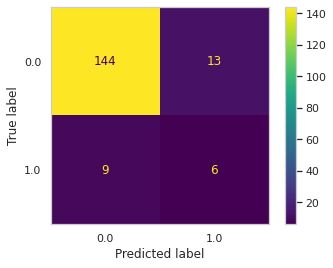

In [ ]:
plot_confusion_matrix(pipe_ada, X_test_sc, y_test_sc)
plt.grid(False)

In [ ]:
y_pred_prob = pipe_ada.predict_proba(X_test_sc)[:, 1]
fpr, tpr, _ = roc_curve(y_test_sc, y_pred_prob, pos_label=1)
roc_auc_sc = auc(fpr, tpr)

print("AUC score: ", roc_auc_sc)

AUC score:  0.8154989384288748


Top 3 most important features for this trained tree: ('STDs:HIV', 'STDs:molluscum contagiosum', 'STDs:AIDS')


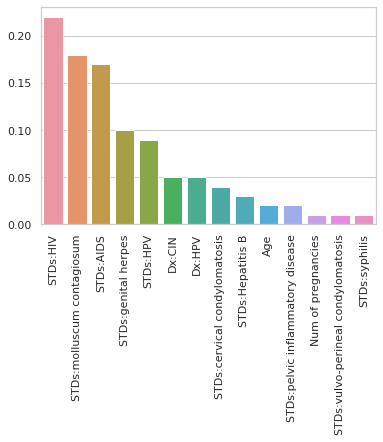

In [ ]:
grid_search_result_ada = pipe_ada.named_steps['gridsearchcv']
best_ada = grid_search_result_ada.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_ada.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_ada[feature_names[i]] += best_ada.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))

ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
print('Top 3 most important features for this trained tree:', feats[:3])

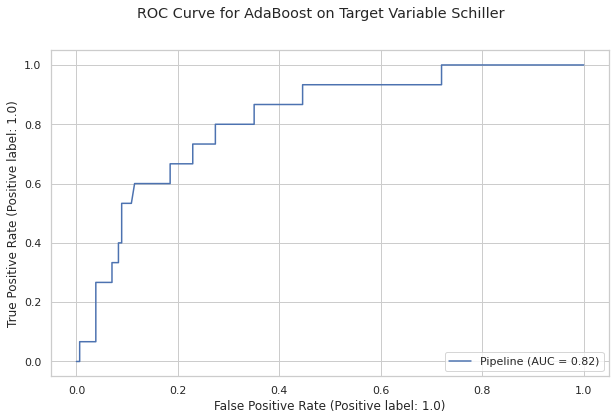

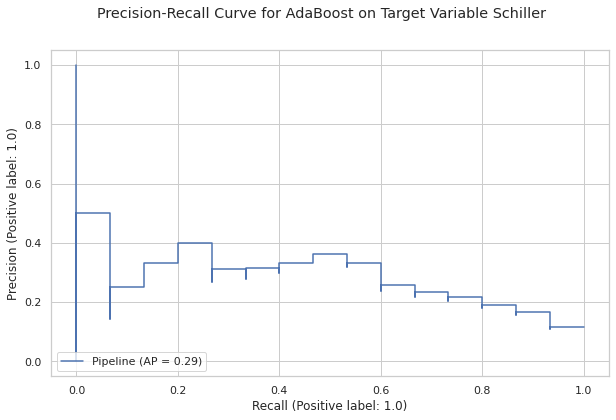

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for AdaBoost on Target Variable Schiller')
plot_roc_curve(pipe_ada, X_test_sc, y_test_sc, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for AdaBoost on Target Variable Schiller')
plot_precision_recall_curve(pipe_ada, X_test_sc, y_test_sc, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_sc, y_pred_ada).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_sc, y_pred_ada):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_sc, y_pred_ada, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_sc, y_pred_ada, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_sc, y_pred_ada, pos_label=1):0.4f}.")

accuracy on test set: 0.8721.
sensitivity on test set: 0.4000.
specificity on test set: 0.9172.
negative predictive accuracy(npa) on test set: 0.9412.
recall on test set: 0.4000.
precision on test set: 0.3158.
F1-score on test set: 0.3529.


In [ ]:
sc_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_sc, y_pred_prob)
sc_pr.append((rc,pr))

### Citology

In [ ]:
# Model Selection
pipe_ada = imb_make_pipeline(smote, preprocess, GridSearchCV(AdaBoostClassifier(random_state=42),
                    param_grid=[{'n_estimators':[50, 100, 150, 200],
                          'learning_rate':[0.01, 0.1, 1]}],
                    cv=5, scoring="roc_auc"))
pipe_ada.fit(X_dev_ci, y_dev_ci)
grid_search_result_ada = pipe_ada.named_steps['gridsearchcv']
best_params = grid_search_result_ada.best_params_
print(f"best parameters: {best_params}")
print(f"best dev set score: {grid_search_result_ada.best_score_}")

best parameters: {'learning_rate': 1, 'n_estimators': 200}
best dev set score: 0.9732454040381227


In [ ]:
y_pred_ada = pipe_ada.predict(X_test_ci)
print(f"accuracy on test set: {pipe_ada.score(X_test_ci,y_test_ci)}")
print(f"recall on test set: {recall_score(y_test_ci,y_pred_ada,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_ci,y_pred_ada,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_ci,y_pred_ada,pos_label=1):0.4f}.")

accuracy on test set: 0.705521472392638
recall on test set: 0.1111.
precision on test set: 0.1111.
F1-score on test set: 0.1111.


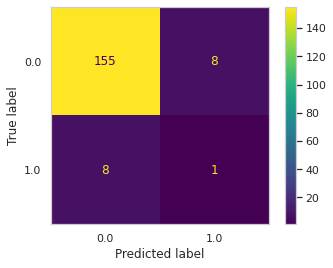

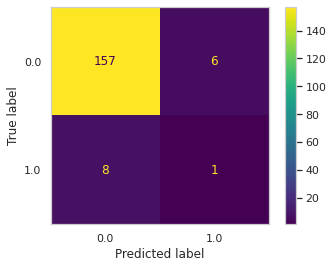

In [ ]:
plot_confusion_matrix(pipe_ada, X_test_ci, y_test_ci)
plt.grid(False)

model = AdaBoostClassifier(n_estimators=best_params['n_estimators'], 
                      learning_rate=best_params['learning_rate']).fit(X_dev_ci, y_dev_ci)
plot_confusion_matrix(model, X_test_ci, y_test_ci)
plt.grid(False)

In [ ]:
y_pred_prob = pipe_ada.predict_proba(X_test_ci)[:, 1]
fpr, tpr, _ = roc_curve(y_test_ci, y_pred_prob, pos_label=1)
roc_auc_ci = auc(fpr, tpr)

print("AUC score: ", roc_auc_ci)

AUC score:  0.705521472392638


Top 3 most important features for this trained tree: ('STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:genital herpes')


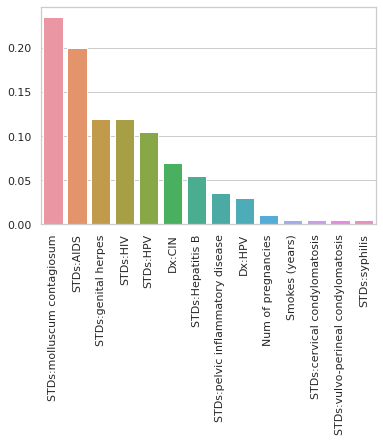

In [ ]:
grid_search_result_ada = pipe_ada.named_steps['gridsearchcv']
best_ada = grid_search_result_ada.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_ada.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_ada[feature_names[i]] += best_ada.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))

ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
print('Top 3 most important features for this trained tree:', feats[:3])

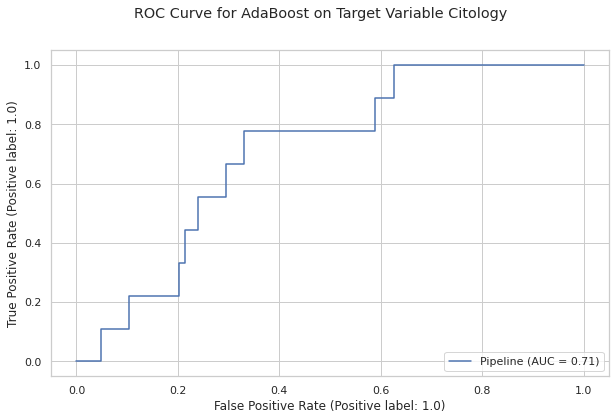

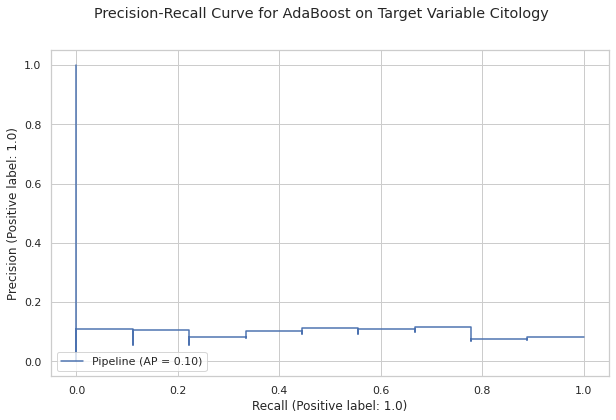

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for AdaBoost on Target Variable Citology')
plot_roc_curve(pipe_ada, X_test_ci, y_test_ci, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for AdaBoost on Target Variable Citology')
plot_precision_recall_curve(pipe_ada, X_test_ci, y_test_ci, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_ci, y_pred_ada).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_ci, y_pred_ada):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_ci, y_pred_ada, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_ci, y_pred_ada, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_ci, y_pred_ada, pos_label=1):0.4f}.")

accuracy on test set: 0.9070.
sensitivity on test set: 0.1111.
specificity on test set: 0.9509.
negative predictive accuracy(npa) on test set: 0.9509.
recall on test set: 0.1111.
precision on test set: 0.1111.
F1-score on test set: 0.1111.


In [ ]:
ci_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_ci, y_pred_prob)
ci_pr.append((rc,pr))

### Biopsy

In [ ]:
# Model Selection
pipe_ada = imb_make_pipeline(smote, preprocess, GridSearchCV(AdaBoostClassifier(random_state=42),
                    param_grid=[{'n_estimators':[50, 100, 150, 200],
                          'learning_rate':[0.01, 0.1, 1]}],
                    cv=5, scoring="roc_auc"))
pipe_ada.fit(X_dev_bi, y_dev_bi)
grid_search_result_ada = pipe_ada.named_steps['gridsearchcv']
best_params = grid_search_result_ada.best_params_
print(f"best parameters: {best_params}")
print(f"best dev set score: {grid_search_result_ada.best_score_}")

best parameters: {'learning_rate': 1, 'n_estimators': 50}
best dev set score: 0.9708473382994187


In [ ]:
y_pred_ada = pipe_ada.predict(X_test_bi)
print(f"accuracy on test set: {pipe_ada.score(X_test_bi,y_test_bi)}")
print(f"recall on test set: {recall_score(y_test_bi,y_pred_ada,pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_bi,y_pred_ada,pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_bi,y_pred_ada,pos_label=1):0.4f}.")

accuracy on test set: 0.8108413325804631
recall on test set: 0.4545.
precision on test set: 0.3846.
F1-score on test set: 0.4167.


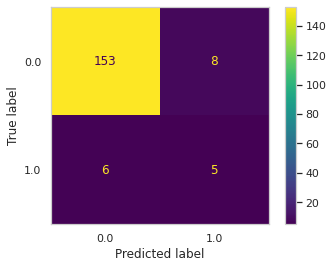

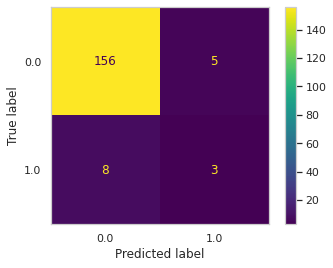

In [ ]:
plot_confusion_matrix(pipe_ada, X_test_bi, y_test_bi)
plt.grid(False)

model = AdaBoostClassifier(n_estimators=best_params['n_estimators'], 
                      learning_rate=best_params['learning_rate']).fit(X_dev_bi, y_dev_bi)
plot_confusion_matrix(model, X_test_bi, y_test_bi)
plt.grid(False)

In [ ]:
y_pred_prob = pipe_ada.predict_proba(X_test_bi)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bi, y_pred_prob, pos_label=1)
roc_auc_bi = auc(fpr, tpr)

print("AUC score: ", roc_auc_bi)

AUC score:  0.8108413325804631


Top 3 most important features for this trained tree: ('STDs:HIV', 'STDs:genital herpes', 'STDs:molluscum contagiosum')


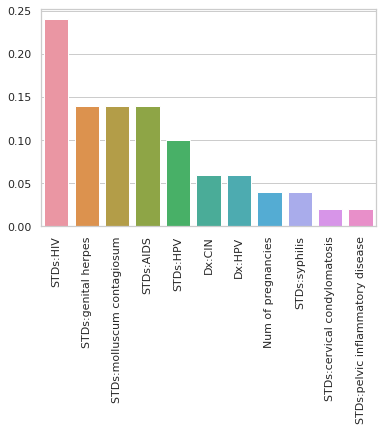

In [ ]:
grid_search_result_ada = pipe_ada.named_steps['gridsearchcv']
best_ada = grid_search_result_ada.best_estimator_

feature_names = numerical_cols + categorical_cols
feat_imps = zip(feature_names, best_ada.feature_importances_)
for i in range(len(feature_names)):
  feat_imps_ada[feature_names[i]] += best_ada.feature_importances_[i]
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))

ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
print('Top 3 most important features for this trained tree:', feats[:3])

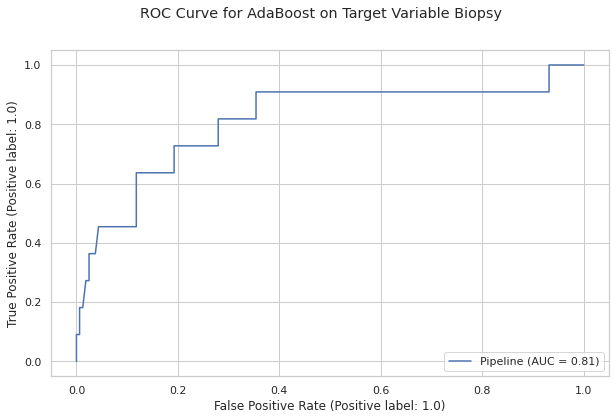

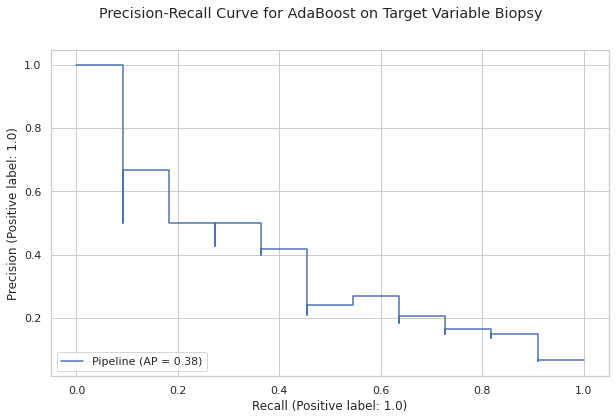

In [ ]:
# ROC
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for AdaBoost on Target Variable Biopsy')
plot_roc_curve(pipe_ada, X_test_bi, y_test_bi, ax=axes)
plt.show()
# precision-recall
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for AdaBoost on Target Variable Biopsy')
plot_precision_recall_curve(pipe_ada, X_test_bi, y_test_bi, ax=axes)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_bi, y_pred_ada).ravel()
print(f"accuracy on test set: {accuracy_score(y_test_bi, y_pred_ada):0.4f}.")
print(f"sensitivity on test set: {(tp / (tp + fn)):0.4f}.")
print(f"specificity on test set: {(tn / (tn + fp)):0.4f}.")
print(f"negative predictive accuracy(npa) on test set: {(tn / (tn + fn)):0.4f}.")
print(f"recall on test set: {recall_score(y_test_bi, y_pred_ada, pos_label=1):0.4f}.")
print(f"precision on test set: {precision_score(y_test_bi, y_pred_ada, pos_label=1):0.4f}.")
print(f"F1-score on test set: {f1_score(y_test_bi, y_pred_ada, pos_label=1):0.4f}.")

accuracy on test set: 0.9186.
sensitivity on test set: 0.4545.
specificity on test set: 0.9503.
negative predictive accuracy(npa) on test set: 0.9623.
recall on test set: 0.4545.
precision on test set: 0.3846.
F1-score on test set: 0.4167.


In [ ]:
bi_roc.append((fpr,tpr))

pr, rc, _ = precision_recall_curve(y_test_bi, y_pred_prob)
bi_pr.append((rc,pr))

### Summary

Make an aggregated feature importance plot for AdaBoost that averages over the target variables

Top 3 most important features for this trained tree: ('STDs:HIV', 'STDs:molluscum contagiosum', 'STDs:AIDS')


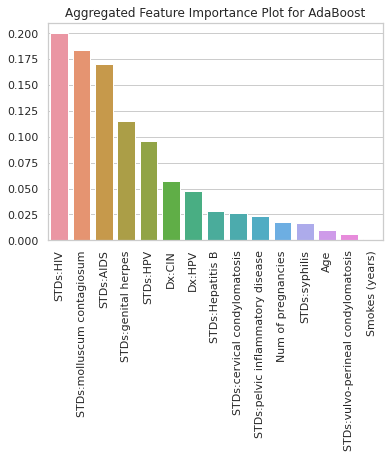

In [ ]:
feature_names = list(feat_imps_ada.keys())
feature_imps = list(feat_imps_ada.values())
feature_imps = [imp/4 for imp in feature_imps]

feat_imps = zip(feature_names, feature_imps)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
ax.set_title('Aggregated Feature Importance Plot for AdaBoost')

print('Top 3 most important features for this trained tree:', feats[:3])

# Comparing Models

## ROC Curves

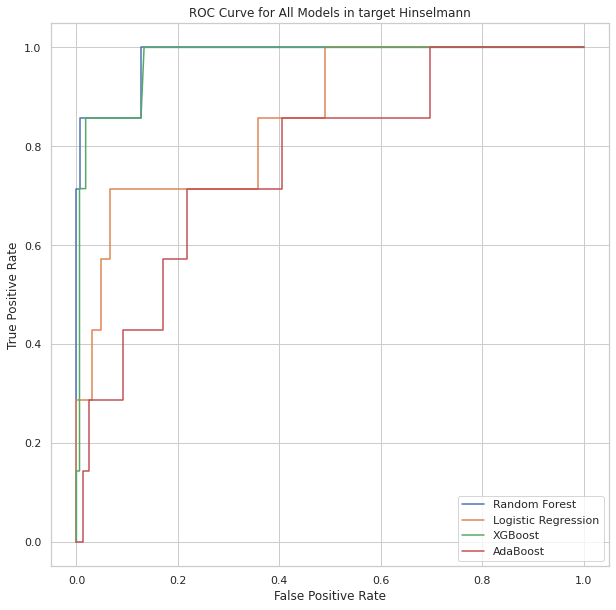

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(hi_roc[0][0],hi_roc[0][1],label="Random Forest")
plt.plot(hi_roc[1][0],hi_roc[1][1],label="Logistic Regression")
plt.plot(hi_roc[2][0],hi_roc[2][1],label="XGBoost")
plt.plot(hi_roc[3][0],hi_roc[3][1],label="AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models in target Hinselmann")
plt.legend()
plt.show()

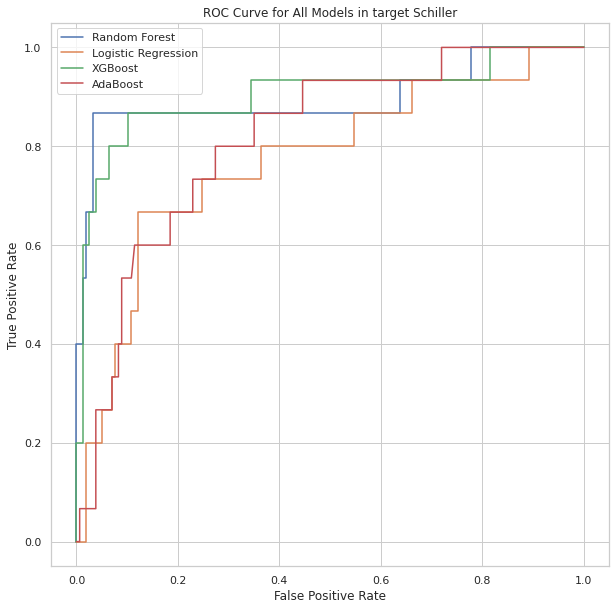

In [ ]:
plt.plot(sc_roc[0][0],sc_roc[0][1],label="Random Forest")
plt.plot(sc_roc[1][0],sc_roc[1][1],label="Logistic Regression")
plt.plot(sc_roc[2][0],sc_roc[2][1],label="XGBoost")
plt.plot(sc_roc[3][0],sc_roc[3][1],label="AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models in target Schiller")
plt.legend()
plt.show()

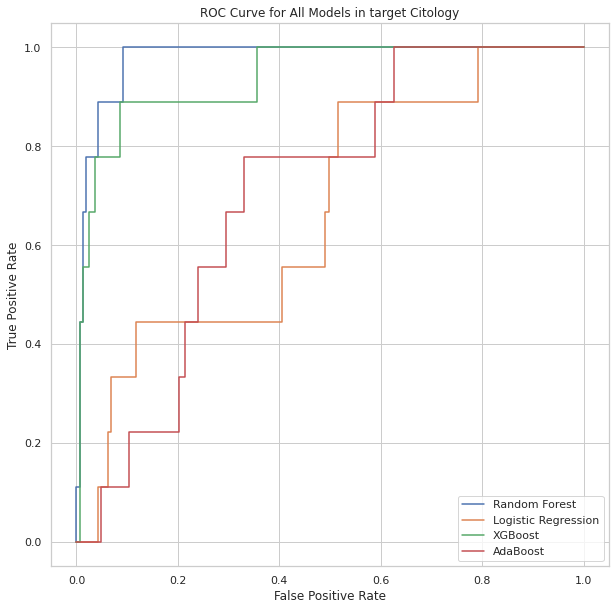

In [ ]:
plt.plot(ci_roc[0][0],ci_roc[0][1],label="Random Forest")
plt.plot(ci_roc[1][0],ci_roc[1][1],label="Logistic Regression")
plt.plot(ci_roc[2][0],ci_roc[2][1],label="XGBoost")
plt.plot(ci_roc[3][0],ci_roc[3][1],label="AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models in target Citology")
plt.legend()
plt.show()

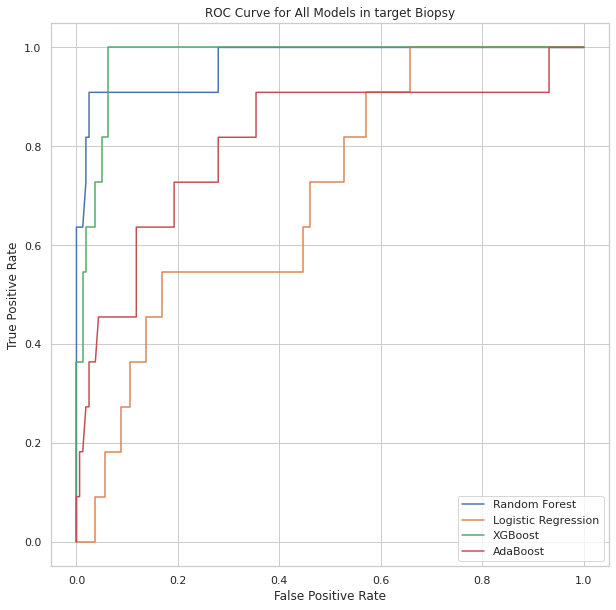

In [ ]:
plt.plot(bi_roc[0][0],bi_roc[0][1],label="Random Forest")
plt.plot(bi_roc[1][0],bi_roc[1][1],label="Logistic Regression")
plt.plot(bi_roc[2][0],bi_roc[2][1],label="XGBoost")
plt.plot(bi_roc[3][0],bi_roc[3][1],label="AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models in target Biopsy")
plt.legend()
plt.show()

## Precision-Recall Curves

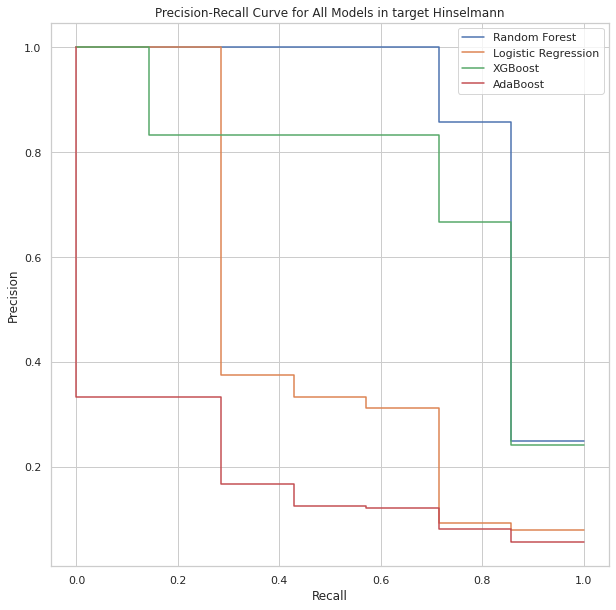

In [ ]:
plt.plot(hi_pr[0][0],np.maximum.accumulate(hi_pr[0][1]),label="Random Forest")
plt.plot(hi_pr[1][0],np.maximum.accumulate(hi_pr[1][1]),label="Logistic Regression")
plt.plot(hi_pr[2][0],np.maximum.accumulate(hi_pr[2][1]),label="XGBoost")
plt.plot(hi_pr[3][0],np.maximum.accumulate(hi_pr[3][1]),label="AdaBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for All Models in target Hinselmann")
plt.legend()
plt.show()

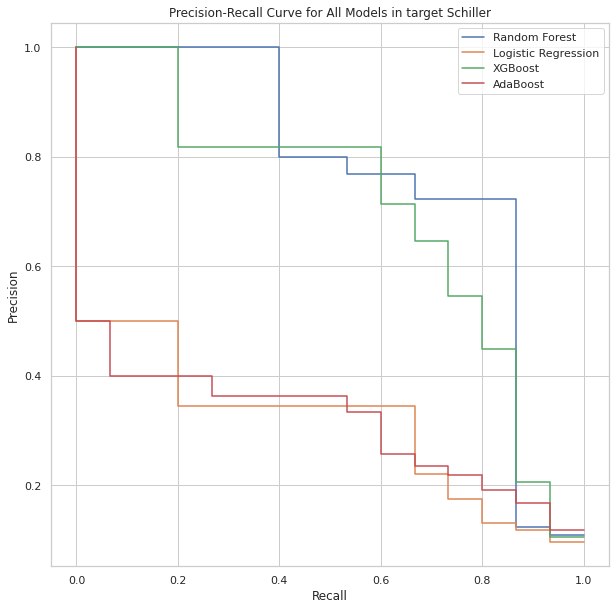

In [ ]:
plt.plot(sc_pr[0][0],np.maximum.accumulate(sc_pr[0][1]),label="Random Forest")
plt.plot(sc_pr[1][0],np.maximum.accumulate(sc_pr[1][1]),label="Logistic Regression")
plt.plot(sc_pr[2][0],np.maximum.accumulate(sc_pr[2][1]),label="XGBoost")
plt.plot(sc_pr[3][0],np.maximum.accumulate(sc_pr[3][1]),label="AdaBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for All Models in target Schiller")
plt.legend()
plt.show()

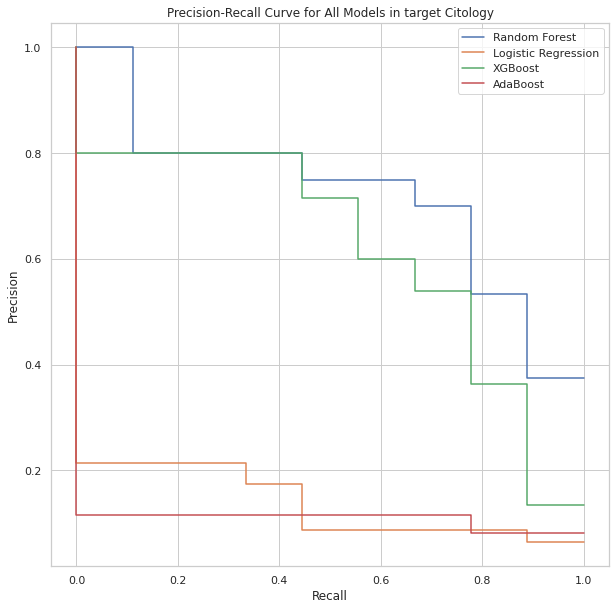

In [ ]:
plt.plot(ci_pr[0][0],np.maximum.accumulate(ci_pr[0][1]),label="Random Forest")
plt.plot(ci_pr[1][0],np.maximum.accumulate(ci_pr[1][1]),label="Logistic Regression")
plt.plot(ci_pr[2][0],np.maximum.accumulate(ci_pr[2][1]),label="XGBoost")
plt.plot(ci_pr[3][0],np.maximum.accumulate(ci_pr[3][1]),label="AdaBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for All Models in target Citology")
plt.legend()
plt.show()

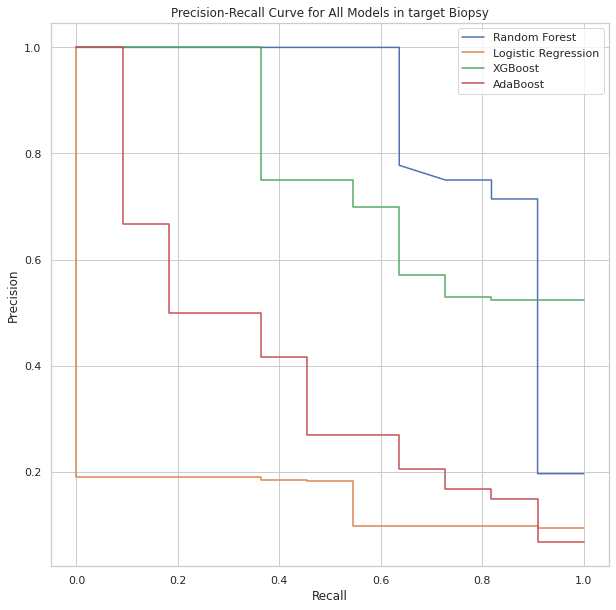

In [ ]:
plt.plot(bi_pr[0][0],np.maximum.accumulate(bi_pr[0][1]),label="Random Forest")
plt.plot(bi_pr[1][0],np.maximum.accumulate(bi_pr[1][1]),label="Logistic Regression")
plt.plot(bi_pr[2][0],np.maximum.accumulate(bi_pr[2][1]),label="XGBoost")
plt.plot(bi_pr[3][0],np.maximum.accumulate(bi_pr[3][1]),label="AdaBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for All Models in target Biopsy")
plt.legend()
plt.show()